In [1]:
import pandas as pd
# for data frames
# pd is a class package that also contains reading csv files 
import numpy as np
# for arrays
import matplotlib.pyplot as plt
# plot functions
from statsmodels.graphics.tsaplots import plot_pacf
# pacf graphs 
from statsmodels.graphics.tsaplots import plot_acf
# acf graphs
import statsmodels.api as sm
# for ARDL 
from statsmodels.tsa.stattools import adfuller, kpss
# for the ADF test
from sklearn.preprocessing import StandardScaler
# for standard sclar on data frames
from PIL import Image, ImageDraw, ImageFont
# to convery summary results into png files


In [2]:
# federal funds rate daily
dFFR = pd.read_csv('/Users/aaron/Econ_187/final_project/FFR_d.csv')
# federal funds rate quarterly
qFFR = pd.read_csv('/Users/aaron/Econ_187/final_project/FFR_q.csv')
# the exchange rate would be more forecasting
# this would be easier
# luxury goods 
# exchange rate for US and Canada
US_Can_ER = pd.read_csv('/Users/aaron/Econ_187/final_project/USCan_er.csv')
# exchange rate for US and Japan
US_Jap_ER = pd.read_csv('/Users/aaron/Econ_187/final_project/USJap_er.csv')
# exchange rate for US and Europe
US_Euro_ER = pd.read_csv('/Users/aaron/Econ_187/final_project/USEuro_er.csv')
# CPI inflation of resturants and hotels (monthly)
CPI_resHotels = pd.read_csv(
    '/Users/aaron/Econ_187/final_project/CPI_resturantsAndHotels/CPI_resAndHotels.csv')
# CPI inflation of sticky prices (monthly)
CPI_stickyPrices = pd.read_csv(
    '/Users/aaron/Econ_187/final_project/CPI_stickyPrices/CPI_stickyPrices.csv')
# CPI inflation of not food and energy from what consumers buy (monthly)
CPI_lessFoodEnergy = pd.read_csv(
    '/Users/aaron/Econ_187/final_project/CPI_lessFoodinUS/CPI_lessFoodAndEnergy_Monthly.csv')
# CPI inflation of food and energy (monthly)
CPI_FoodEnergy = pd.read_csv(
    '/Users/aaron/Econ_187/final_project/CPI_Food/CPI_food.csv')
# CPI inflation exclude food and energy (monthly)
CPI_excludeFoo = pd.read_csv(
    '/Users/aaron/Econ_187/final_project/CPI_excludeFoodAndEnergy/CPI_eFoodEnergy.csv')


In [3]:
dFFR = dFFR.rename(columns = {'DFF' : 'Daily_FFR'})
qFFR = qFFR.rename(columns = {'BOGZ1FL072052006Q' : 'Quarterly_FFR'})
US_Can_ER = US_Can_ER.rename(columns = {'DEXCAUS' : 'US_Canada_Exchange_Rate'})
US_Jap_ER = US_Jap_ER.rename(columns = {'DEXJPUS' : 'US_Japan_Exchange_Rate'})
US_Euro_ER = US_Euro_ER.rename(columns = {'DEXUSEU' : 'US_Euro_Exchange_Rate'})
CPI_resHotels = CPI_resHotels.rename(columns = {
    'USACP110000CTGYM' : 'CPI_of_resturants_hotels'})
CPI_stickyPrices = CPI_stickyPrices.rename(columns = {
    'CORESTICKM159SFRBATL' : 'CPI_of_stickyPrices'})
CPI_lessFoodEnergy = CPI_lessFoodEnergy.rename(columns = {
    'CPILFESL' : 'CPI_of_lessFoodEnergy'})
CPI_FoodEnergy = CPI_FoodEnergy.rename(columns = {'CPIUFDSL' : 'CPI_of_FoodEnergy'})
CPI_excludeFoo = CPI_excludeFoo.rename(columns = {'USACPICORMINMEI' : 'CPI_of_excludeFood'})

# rename function

In [4]:
dFFR['DATE']= pd.to_datetime(dFFR['DATE'])
qFFR['DATE']= pd.to_datetime(qFFR['DATE'])
US_Can_ER['DATE']= pd.to_datetime(US_Can_ER['DATE'])
US_Jap_ER['DATE']= pd.to_datetime(US_Jap_ER['DATE'])
US_Euro_ER['DATE']= pd.to_datetime(US_Euro_ER['DATE'])
CPI_resHotels['DATE']= pd.to_datetime(CPI_resHotels['DATE'])
CPI_stickyPrices['DATE']= pd.to_datetime(CPI_stickyPrices['DATE'])
CPI_lessFoodEnergy['DATE']= pd.to_datetime(CPI_lessFoodEnergy['DATE'])
CPI_FoodEnergy['DATE']= pd.to_datetime(CPI_FoodEnergy['DATE'])
CPI_excludeFoo['DATE']= pd.to_datetime(CPI_excludeFoo['DATE'])

# turn the date column into a date time object 

In [5]:
print(
US_Can_ER['DATE'].min(),
US_Jap_ER['DATE'].min(),
US_Euro_ER['DATE'].min(),
CPI_resHotels['DATE'].min(),
CPI_stickyPrices['DATE'].min(),
CPI_lessFoodEnergy['DATE'].min(),
CPI_FoodEnergy['DATE'].min(),
CPI_excludeFoo['DATE'].min()
)


2018-04-30 00:00:00 2018-04-30 00:00:00 2018-04-30 00:00:00 2011-12-01 00:00:00 1967-12-01 00:00:00 1957-01-01 00:00:00 1947-01-01 00:00:00 1960-01-01 00:00:00


In [6]:
# daily federal funds rate
dFFR.head()


,DATE,Daily_FFR
0,2018-05-02,1.7
1,2018-05-03,1.7
2,2018-05-04,1.7
3,2018-05-05,1.7
4,2018-05-06,1.7


In [7]:
# quarterly federal funds rate
qFFR.head()


,DATE,Quarterly_FFR
0,1954-07-01,1.07
1,1954-10-01,1.28
2,1955-01-01,1.35
3,1955-04-01,1.64
4,1955-07-01,2.18


In [8]:
indices_can = US_Can_ER.index[US_Can_ER['US_Canada_Exchange_Rate'] == '.']
US_Can_ER = US_Can_ER.drop(indices_can)


In [9]:
US_Can_ER['US_Canada_Exchange_Rate'] = US_Can_ER['US_Canada_Exchange_Rate'].astype(float)


In [10]:
# US and Canada exchange rate
US_Can_ER.head()


,DATE,US_Canada_Exchange_Rate
0,2018-04-30,1.2818
1,2018-05-01,1.2873
2,2018-05-02,1.2848
3,2018-05-03,1.2878
4,2018-05-04,1.2848


In [11]:
# removing indices of strings
indices_jap = US_Jap_ER.index[US_Jap_ER['US_Japan_Exchange_Rate'] == '.']
US_Jap_ER = US_Jap_ER.drop(indices_jap)


In [12]:
# converting the strings into floats
US_Jap_ER['US_Japan_Exchange_Rate'] = US_Jap_ER['US_Japan_Exchange_Rate'].astype(float)


In [13]:
# US and Japan exchange rate
US_Jap_ER.head()


,DATE,US_Japan_Exchange_Rate
0,2018-04-30,109.28
1,2018-05-01,109.69
2,2018-05-02,109.89
3,2018-05-03,109.06
4,2018-05-04,109.16


In [14]:
# removing indices of strings in the data
indices_euro = US_Euro_ER.index[US_Euro_ER['US_Euro_Exchange_Rate'] == '.']
US_Euro_ER = US_Euro_ER.drop(indices_euro)


In [15]:
# converting the string into float data
US_Euro_ER['US_Euro_Exchange_Rate'] = US_Euro_ER['US_Euro_Exchange_Rate'].astype(float)


In [16]:
# US and Europe exchange rate
US_Euro_ER.head()


,DATE,US_Euro_Exchange_Rate
0,2018-04-30,1.2074
1,2018-05-01,1.2000
2,2018-05-02,1.1968
3,2018-05-03,1.1970
4,2018-05-04,1.1946


In [17]:
# CPI (price of resturants and hotels)
CPI_resHotels.head()


,DATE,CPI_of_resturants_hotels
0,2011-12-01,0.179332
1,2012-01-01,0.162184
2,2012-02-01,0.131000
3,2012-03-01,0.053169
4,2012-04-01,0.057289


In [18]:
# CPI of items that are sticky prices
CPI_stickyPrices.head()


,DATE,CPI_of_stickyPrices
0,1967-12-01,3.383497
1,1968-01-01,3.659987
2,1968-02-01,3.682012
3,1968-03-01,4.151668
4,1968-04-01,4.165427


In [19]:
# CPI of items that consumers do not buy that is not food or energy 
CPI_lessFoodEnergy.head()


,DATE,CPI_of_lessFoodEnergy
0,1957-01-01,28.5
1,1957-02-01,28.6
2,1957-03-01,28.7
3,1957-04-01,28.8
4,1957-05-01,28.8


In [20]:
# CPI of items that are food/energy
CPI_FoodEnergy.head()


,DATE,CPI_of_FoodEnergy
0,1947-01-01,22.8
1,1947-02-01,23.1
2,1947-03-01,23.8
3,1947-04-01,23.5
4,1947-05-01,23.4


In [21]:
# CPI of items that are not food/energy
CPI_excludeFoo.head()


,DATE,CPI_of_excludeFood
0,1960-01-01,12.590481
1,1960-02-01,12.631761
2,1960-03-01,12.631761
3,1960-04-01,12.631761
4,1960-05-01,12.631761


## SECTION 1: CPI and FFR (inflation)
doing ARDl and time series analysis on the federal funds rate and CPI inflation

In [22]:
# combining all the CPI data frames to create one data frame to calculate inflation
# combined based on dates 
CPI = pd.merge(CPI_resHotels, CPI_stickyPrices, on = 'DATE')
CPI = pd.merge(CPI, CPI_lessFoodEnergy, on = 'DATE')
CPI = pd.merge(CPI, CPI_FoodEnergy, on = 'DATE')
CPI = pd.merge(CPI, CPI_excludeFoo, on = 'DATE')
# merge combines two (ONLY TWO) data frames into one base on a similar column


In [23]:
# CPI rates for inflation 
CPI.head()


,DATE,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
0,2011-12-01,0.179332,2.047850,227.405,231.557,93.598876
1,2012-01-01,0.162184,2.115928,227.877,232.213,93.804038
2,2012-02-01,0.131000,2.018191,228.034,232.140,94.063279
3,2012-03-01,0.053169,2.124758,228.478,232.591,94.422417
4,2012-04-01,0.057289,2.193793,228.905,233.044,94.656889


In [24]:
# scaling the data to make the units fit 
date = CPI['DATE']
scaler = StandardScaler()
CPI = pd.DataFrame(scaler.fit_transform(CPI.iloc[:, 1:]), columns = CPI.columns[1:])
CPI.insert(0, 'DATE', date)


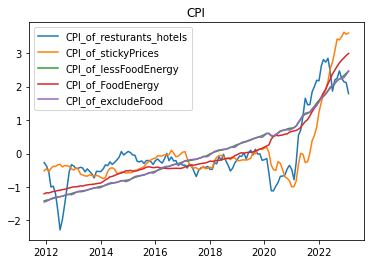

In [25]:
fig, ax = plt.subplots()

# fig here indicates the figure object to hold all the elements of the plot
# fig allows you to interact with the overall plot

x = CPI['DATE']
for i in CPI.columns[1:]:
    ax.plot(x, CPI[i], label = i)

ax.set_title('CPI')
ax.legend()
plt.show()


In [26]:
CPI.to_csv("CPI.csv")

In [27]:
CPI.head()

,DATE,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
0,2011-12-01,-0.268132,-0.513089,-1.415541,-1.202964,-1.449720
1,2012-01-01,-0.367528,-0.451463,-1.391657,-1.172206,-1.424553
2,2012-02-01,-0.548292,-0.539937,-1.383713,-1.175629,-1.392752
3,2012-03-01,-0.999444,-0.443471,-1.361247,-1.154482,-1.348696
4,2012-04-01,-0.975561,-0.380979,-1.339641,-1.133242,-1.319934


We see here that this figure is non-stationary, and all the CPI follows some trend of rising except for resturants and hotels, perhaps subsizing the data from 2020 to 2023, or 2019 to 2023 would be better.

Let's calculate the inflation rate and plot them to do more exploratory analysis. 


In [28]:
# CPI.iloc[:, 1:]
# calculating inflation
inflation = CPI.iloc[:, 1:].pct_change(axis = 0).dropna(axis = 0)
inflation['DATE'] = CPI['DATE'][1:]
# this is slicing indexing, this would take all the data from CPI['DATE'] but the first value


In [29]:
# inflation rates for different categories 
inflation.head()
# we now have our inflation data frame


,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood,DATE
1,0.370697,-0.120107,-0.016872,-0.025569,-0.017360,2012-01-01
2,0.491838,0.195970,-0.005708,0.002920,-0.022323,2012-02-01
3,0.822831,-0.178661,-0.016236,-0.017987,-0.031632,2012-03-01
4,-0.023897,-0.140915,-0.015872,-0.018398,-0.021326,2012-04-01
5,0.225726,0.009762,-0.012049,-0.007241,-0.011471,2012-05-01


In [30]:
# plan: clean up data set, create quarterly data and combine qFFR and all the CPI
# then clean up the ER datasets and get the daily ERR
# take correlation between them 


In [31]:
dFFR.head()

,DATE,Daily_FFR
0,2018-05-02,1.7
1,2018-05-03,1.7
2,2018-05-04,1.7
3,2018-05-05,1.7
4,2018-05-06,1.7


In [32]:
# converting the daily federal funds rate into monthly data 
# creating data frame with federal funds rate and quarterly
# use daily ffr to create monthly ffr (take the average)
dFFR.set_index('DATE', inplace=True)
# sets the unique identifier 
# this would allow resampling to align properly 
mFFR = dFFR.resample('M').mean()
# resample allows you to use date objects and resample time-series objects, in this case it
# takes the dataframe and creates a new one 
mFFR.index = mFFR.index.to_period('M').to_timestamp('D')
# This line converts the index of the DataFrame mFFR from a DatetimeIndex to a PeriodIndex 
# with a frequency of 'M' (monthly). Then, it converts the PeriodIndex back to a 
# DatetimeIndex with a frequency of 'D' (daily). This is done to have the index representing 
# the first day of each month.
mFFR.rename(columns = {'Daily_FFR':'Monthly_FFR'}, inplace = True)


In [33]:
mFFR.head()


,Monthly_FFR
DATE,
2018-05-01,1.700000
2018-06-01,1.819667
2018-07-01,1.910000
2018-08-01,1.914839
2018-09-01,1.954667


In [34]:
# creating a new data frame called FFR_inf that is the combination of the 
# federal funding rate (monthly) with the inflation rate (monthly) 
# merging the monthly FFR and inflation data frame to do casual correlation
FFR_inf = pd.merge(mFFR, inflation, on = 'DATE')


In [35]:
FFR_inf.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
0,2018-05-01,1.700000,-0.703664,-0.425335,0.412042,0.000690,0.268092
1,2018-06-01,1.819667,1.191463,-0.118095,0.143920,-0.069664,0.108564
2,2018-07-01,1.910000,-0.888357,0.546588,0.148598,-0.106513,0.073019
3,2018-08-01,1.914839,8.714296,0.912934,0.082799,-0.097083,0.058043
4,2018-09-01,1.954667,0.615298,-0.159831,0.189974,-0.108134,0.157766


In [36]:
FFR_inf.columns[1]


'Monthly_FFR'

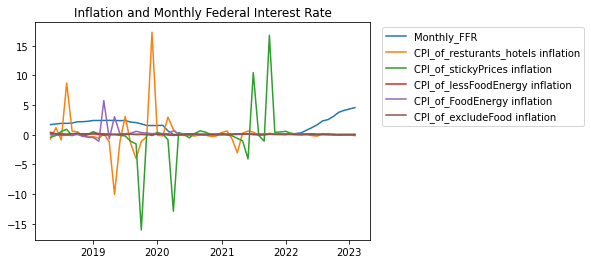

In [37]:
fig, ax = plt.subplots()

# fig here indicates the figure object to hold all the elements of the plot
# fig allows you to interact with the overall plot

x = FFR_inf['DATE']
for i in FFR_inf.columns[1:]:
    if (i != 'Monthly_FFR'):
        ax.plot(x, FFR_inf[i], label = i + ' inflation')
    else:
        ax.plot(x, FFR_inf[i], label = i)

ax.set_title('Inflation and Monthly Federal Interest Rate')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


In [38]:
FFR_inf.to_csv('all_time.csv')

In [39]:
FFR_inf.head()

,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
0,2018-05-01,1.700000,-0.703664,-0.425335,0.412042,0.000690,0.268092
1,2018-06-01,1.819667,1.191463,-0.118095,0.143920,-0.069664,0.108564
2,2018-07-01,1.910000,-0.888357,0.546588,0.148598,-0.106513,0.073019
3,2018-08-01,1.914839,8.714296,0.912934,0.082799,-0.097083,0.058043
4,2018-09-01,1.954667,0.615298,-0.159831,0.189974,-0.108134,0.157766


We see the **CURRENT** monthly interest rate is steadily increasing but the inflation rate seems to not be affected from 2022 to 2023, let's see if the change in monthly_ffr and the change in inflation would work, aka let's take the first difference. 


In [40]:
FFR_inf.iloc[:, 1:].corr().iloc[:,0]
# takes every row and every column starting from the second and take the correlation matrix of
#  that
# the .iloc[0, :] would take all of the rows but only the first column
# we see low correlation 
# interest rates largely determined by the FED
# interest rates decrease IR cuz inflation is going down
# look at interest rate shocks 
# look into time series for expected interest rate going into a fed meeting 
# take unexpected interest rate correlate with inflation 
# interest rate going up, which inflation came up first 
# what was actually related 
# look into monetary shock paper 


Monthly_FFR                 1.000000
CPI_of_resturants_hotels   -0.034882
CPI_of_stickyPrices        -0.076040
CPI_of_lessFoodEnergy       0.146265
CPI_of_FoodEnergy           0.081151
CPI_of_excludeFood          0.129993
Name: Monthly_FFR, dtype: float64

In [41]:
# reading in shock data
mone_shock = pd.read_stata(
    '/Users/aaron/Econ_187/final_project/Monetary_shocks/RR_monetary_shock_monthly.dta')


In [42]:
mone_shock.tail()
# resid is original Romer Romer shocks
# resid_romer is monetary policy shocks base on Romer Romer regression
    # i think this is predicted 
# resid_full is monetary policy shocks base on Romer Romer regression running on full sample
    # i think is predicted - actual
    

,date,resid,resid_romer,resid_full
463,2007-08-01,NaN,-0.006856,0.024113
464,2007-09-01,NaN,-0.628928,-0.587556
465,2007-10-01,NaN,-0.381429,-0.317340
466,2007-11-01,NaN,0.000000,0.000000
467,2007-12-01,NaN,-0.129283,-0.061559


In [43]:
mone_shock.rename(columns = {'date':'DATE'}, inplace = True)


In [44]:
mone_shock.head()


,DATE,resid,resid_romer,resid_full
0,1969-01-01,0.000000,0.000000,0.000000
1,1969-02-01,0.000000,0.000000,0.000000
2,1969-03-01,-0.245265,-0.246049,-0.227409
3,1969-04-01,0.404782,0.405133,0.464021
4,1969-05-01,0.203940,0.204796,0.209193


In [45]:
# combining CPI for the monetary shock, one of the CPI data frames does not correlate with the
#    date 
CPI_shock = pd.merge(CPI_stickyPrices, CPI_lessFoodEnergy, on = 'DATE')
CPI_shock = pd.merge(CPI_shock, CPI_FoodEnergy, on = 'DATE')
CPI_shock = pd.merge(CPI_shock, CPI_excludeFoo, on = 'DATE')


In [46]:
CPI_shock.head()


,DATE,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
0,1967-12-01,3.383497,35.4,34.6,14.613214
1,1968-01-01,3.659987,35.5,34.6,14.654494
2,1968-02-01,3.682012,35.7,34.8,14.695775
3,1968-03-01,4.151668,35.8,34.9,14.778335
4,1968-04-01,4.165427,35.9,35.0,14.819616


In [47]:
inflation_shock = CPI_shock.iloc[:, 1:].pct_change(axis = 0).dropna(axis = 0)
inflation_shock.insert(0, 'DATE', CPI_shock['DATE'][1:])


In [48]:
inflation_shock = pd.merge(inflation_shock, mone_shock, on = 'DATE')


In [49]:
inflation_shock.head()


,DATE,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood,resid,resid_romer,resid_full
0,1969-01-01,0.007143,0.002688,0.002778,0.002688,0.000000,0.000000,0.000000
1,1969-02-01,0.000589,0.008043,0.000000,0.005362,0.000000,0.000000,0.000000
2,1969-03-01,0.064865,0.005319,0.002770,0.008000,-0.245265,-0.246049,-0.227409
3,1969-04-01,0.062030,0.007937,0.005525,0.007937,0.404782,0.405133,0.464021
4,1969-05-01,0.042134,0.000000,0.005495,0.002625,0.203940,0.204796,0.209193


In [50]:
inflation_shock.corr().iloc[6,:]


CPI_of_stickyPrices     -0.001323
CPI_of_lessFoodEnergy    0.013477
CPI_of_FoodEnergy        0.077016
CPI_of_excludeFood      -0.008550
resid                    0.996113
resid_romer              0.995169
resid_full               1.000000
Name: resid_full, dtype: float64

In [51]:
# look into different businesses
    # small businesses 
    # big firms 
    # unemployment 
    # time? 
    # GDP 
    # what is FFR also predicting/correlating 


In [52]:
# taking the first difference
# of the FFR_inf data frame, the difference between the inflation and federal funds rate
# aka the change in inflation and federal funds rate 
FFR_diff = FFR_inf.iloc[:, 1:].diff()
DATE = FFR_inf.iloc[:, 0]
# getting the date, omg y did this take me so long
FFR_diff.insert(0, 'DATE', DATE)
FFR_diff = FFR_diff.iloc[1:, :]
# gets everything but the first row 
# takes every row but the first in 1:
# takes all the column in : 

# NOTE : is slicing, taking everything from START:END:BY
# comma, is there to separate rows and columns
# : is needed to show that you are taking everything
# : all the rows
# gettling all the 


In [53]:
FFR_diff.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
1,2018-06-01,0.119667,1.895127,0.307240,-0.268122,-0.070354,-0.159528
2,2018-07-01,0.090333,-2.079820,0.664683,0.004678,-0.036849,-0.035544
3,2018-08-01,0.004839,9.602653,0.366346,-0.065799,0.009430,-0.014976
4,2018-09-01,0.039828,-8.098998,-1.072765,0.107175,-0.011051,0.099723
5,2018-10-01,0.233075,-0.119771,0.467202,-0.006231,0.153472,0.049413


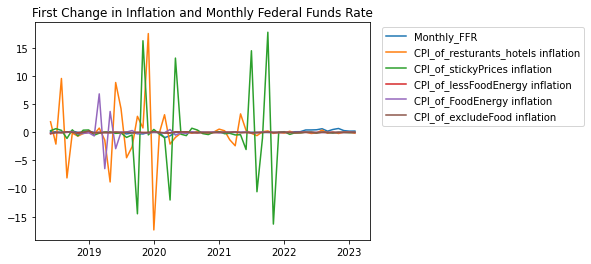

In [54]:
fig, ax = plt.subplots()

# fig here indicates the figure object to hold all the elements of the plot
# fig allows you to interact with the overall plot

x = FFR_diff['DATE']
for i in FFR_diff.columns[1:]:
    if (i != 'Monthly_FFR'):
        ax.plot(x, FFR_diff[i], label = i + ' inflation')
    else:
        ax.plot(x, FFR_diff[i], label = i)

ax.set_title('First Change in Inflation and Monthly Federal Funds Rate')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


In [55]:
FFR_diff.to_csv('alltimefirstdiff.csv')

From a first glance, it does not seem very stationary, but the change in federal funds rate seems to be a bit correlated with the change in inflation of resturants and hotels for 2022 to 2023, my question now is what was happening between 2020 and 2021 for the large dips? 

But first, let's test for correlation and stationarity. 


In [56]:
# test stationarity 
# null is non-stationary
for i in FFR_diff.columns[1:]:
    test_data = FFR_diff[i]
    adf_result = adfuller(test_data)
    adf_statistic = adf_result[0]
    adf_pvalue = adf_result[1]
    print("ADF statistic for ", i, ": ", adf_statistic)
    print("ADF p value for ", i, ": ", adf_pvalue)
    if (adf_pvalue < 0.05):
        print("reject, stationary \n")
    else:
        print("fail to reject, non-stationary \n")


ADF statistic for  Monthly_FFR :  -3.274996430339989
ADF p value for  Monthly_FFR :  0.016033806384935782
reject, stationary 

ADF statistic for  CPI_of_resturants_hotels :  -7.021445193376234
ADF p value for  CPI_of_resturants_hotels :  6.527499581359175e-10
reject, stationary 

ADF statistic for  CPI_of_stickyPrices :  -5.890739855687122
ADF p value for  CPI_of_stickyPrices :  2.928574375607634e-07
reject, stationary 

ADF statistic for  CPI_of_lessFoodEnergy :  -8.395019653072866
ADF p value for  CPI_of_lessFoodEnergy :  2.3115325568790794e-13
reject, stationary 

ADF statistic for  CPI_of_FoodEnergy :  -4.259150158934371
ADF p value for  CPI_of_FoodEnergy :  0.0005224052784504285
reject, stationary 

ADF statistic for  CPI_of_excludeFood :  -7.8822547221459685
ADF p value for  CPI_of_excludeFood :  4.668973999943584e-12
reject, stationary 



Everything seems stationary except for the CPI of sticky prices, given that if we take the second difference of CPI of sticky prices, we would lose another row of data and given with that limited data we have, I would prefer not to take this difference, but at the end, I would take the difference and run an ARDL model with it. 


In [57]:
FFR_diff.corr()


,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
Monthly_FFR,1.000000,-0.019426,0.096061,0.146124,-0.022581,0.209477
CPI_of_resturants_hotels,-0.019426,1.000000,-0.008121,-0.207309,-0.142911,-0.207790
CPI_of_stickyPrices,0.096061,-0.008121,1.000000,0.142399,-0.024710,0.087572
CPI_of_lessFoodEnergy,0.146124,-0.207309,0.142399,1.000000,-0.019722,0.602408
CPI_of_FoodEnergy,-0.022581,-0.142911,-0.024710,-0.019722,1.000000,-0.096983
CPI_of_excludeFood,0.209477,-0.207790,0.087572,0.602408,-0.096983,1.000000


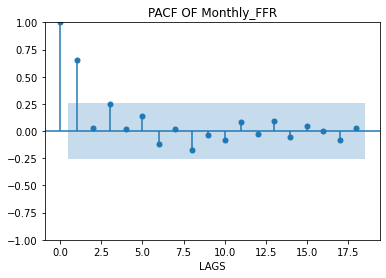

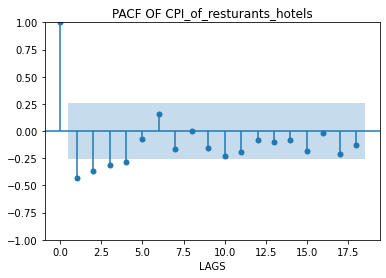

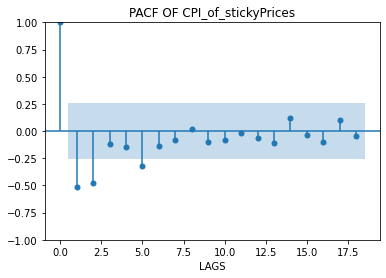

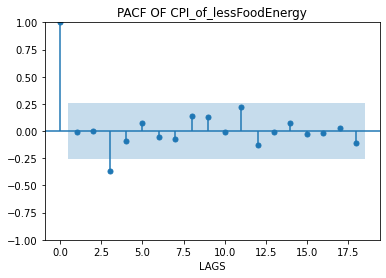

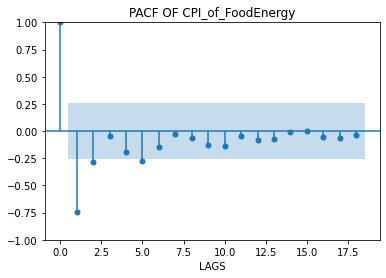

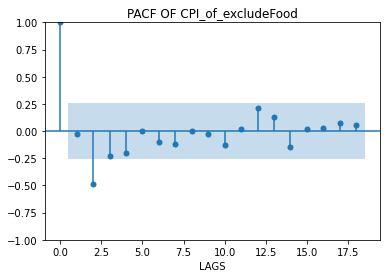

In [58]:
# for every column starting at the second column, create the PACF graph 
for i in FFR_diff.columns[1:]:
    plot_pacf(FFR_diff[i], method = 'ywm')
    plt.title("PACF OF " + i)
    plt.xlabel("LAGS")
    

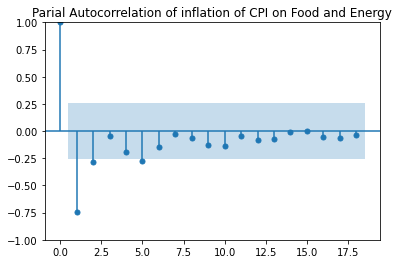

In [59]:
plot_pacf(FFR_diff['CPI_of_FoodEnergy'], method = 'ywm')
plt.title("Parial Autocorrelation of inflation of CPI on Food and Energy")
plt.savefig("CPI_of_FoodEnergy_pacf.png")


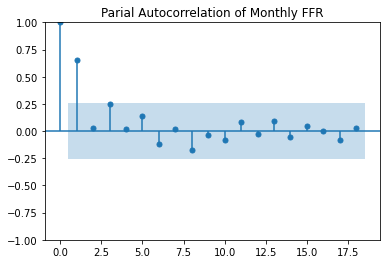

In [60]:
plot_pacf(FFR_diff['Monthly_FFR'], method = 'ywm')
plt.title("Parial Autocorrelation of Monthly FFR")
plt.savefig("Monthly_FFR_pacf.png")


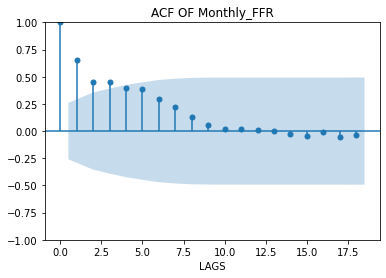

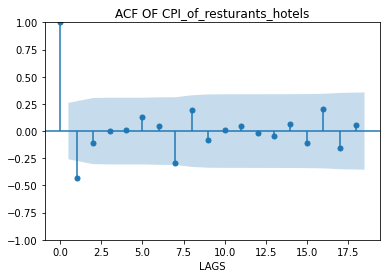

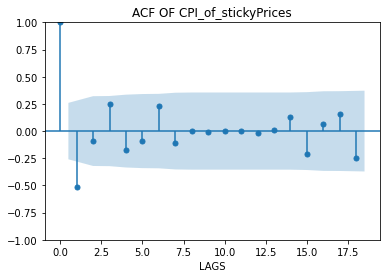

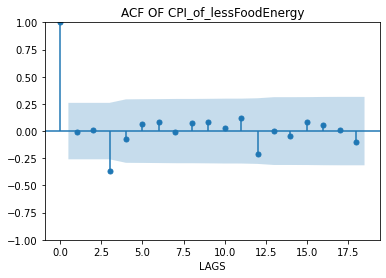

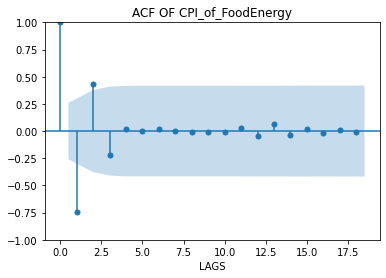

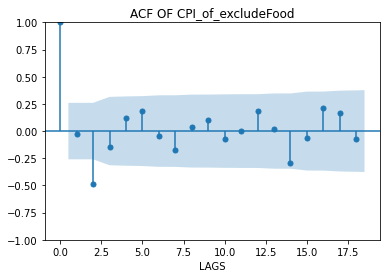

In [61]:
# for every column starting at the second, take the ACF 
for i in FFR_diff.columns[1:]:
    plot_acf(FFR_diff[i])
    plt.title("ACF OF " + i)
    plt.xlabel("LAGS")
    

It seems that the monthly FFR follows an AR graph to the third or second lag
It seems like inflation for the CPI does not follow the same trend

In [62]:
# base on the graphs i made, i can try to create an AR model with inflation and FFR to see 
#    how it predicts
# use an ARDL 
# test FFR with lag 1 and 3
# test inflation of resturants and hotels with lag 2
# test inflation of sticky prices with lag 2 and 3
# test inflation of everything not food or energy with lag 2 and 3
# test inflation of food and energy with lag 1 and 3
# test inflation of everything excluding food with lag 2 and 3 
FFR_diff.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
1,2018-06-01,0.119667,1.895127,0.307240,-0.268122,-0.070354,-0.159528
2,2018-07-01,0.090333,-2.079820,0.664683,0.004678,-0.036849,-0.035544
3,2018-08-01,0.004839,9.602653,0.366346,-0.065799,0.009430,-0.014976
4,2018-09-01,0.039828,-8.098998,-1.072765,0.107175,-0.011051,0.099723
5,2018-10-01,0.233075,-0.119771,0.467202,-0.006231,0.153472,0.049413


### ARDL of FFR and CPI resturants/hotels
* FFR lag 1 and 3
* CPI resturants and hotels lag 1, 2, 3, 4

In [63]:
# use double indexing [[]] to get multiple columns using their names 
FFR_resHotels = FFR_diff[['DATE', 'CPI_of_resturants_hotels','Monthly_FFR']].copy()
FFR_resHotels['CPI(LAG1)'] = FFR_resHotels['CPI_of_resturants_hotels'].shift(1)
FFR_resHotels['CPI(LAG2)'] = FFR_resHotels['CPI_of_resturants_hotels'].shift(2)
FFR_resHotels['CPI(LAG3)'] = FFR_resHotels['CPI_of_resturants_hotels'].shift(3)
FFR_resHotels['CPI(LAG4)'] = FFR_resHotels['CPI_of_resturants_hotels'].shift(4)
FFR_resHotels['FFR(LAG1)'] = FFR_resHotels['Monthly_FFR'].shift(1)
FFR_resHotels['FFR(LAG3)'] = FFR_resHotels['Monthly_FFR'].shift(3)
FFR_resHotels.dropna(inplace = True)
FFR_resHotels = sm.add_constant(FFR_resHotels)


In [64]:
FFR_resHotels.head()


,const,DATE,CPI_of_resturants_hotels,Monthly_FFR,CPI(LAG1),CPI(LAG2),CPI(LAG3),CPI(LAG4),FFR(LAG1),FFR(LAG3)
5,1.0,2018-10-01,-0.119771,0.233075,-8.098998,9.602653,-2.079820,1.895127,0.039828,0.090333
6,1.0,2018-11-01,-0.662235,0.009925,-0.119771,-8.098998,9.602653,-2.079820,0.233075,0.004839
7,1.0,2018-12-01,-0.201075,0.076527,-0.662235,-0.119771,-8.098998,9.602653,0.009925,0.039828
8,1.0,2019-01-01,0.042325,0.125806,-0.201075,-0.662235,-0.119771,-8.098998,0.076527,0.233075
9,1.0,2019-02-01,-0.277219,0.000000,0.042325,-0.201075,-0.662235,-0.119771,0.125806,0.009925


In [65]:
print(FFR_resHotels.shape)

(53, 10)


In [66]:
# ARDL(1, 1)
ARDL_RH11 = sm.OLS(endog = FFR_resHotels['CPI_of_resturants_hotels'],
                   exog = sm.add_constant(FFR_resHotels[['CPI(LAG1)', 'FFR(LAG1)']])).fit()


In [67]:
ARDL_RH11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     CPI_of_resturants_hotels   R-squared:                       0.149
Model:                                  OLS   Adj. R-squared:                  0.115
Method:                       Least Squares   F-statistic:                     4.390
Date:                      Thu, 15 Jun 2023   Prob (F-statistic):             0.0175
Time:                              00:09:16   Log-Likelihood:                -144.74
No. Observations:                        53   AIC:                             295.5
Df Residuals:                            50   BIC:                             301.4
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0340      0.534     -0.064      0.950      -1.106       1.038
CPI(LAG1)     -0.3695      0.126     -2.936      0.005      -0.622      -0.117
FFR(LAG1)     -0.9086      2.060     -0.441      0.661      -5.046       3.229
==============================================================================
Omnibus:                       34.486   Durbin-Watson:                   2.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.471
Skew:                           1.353   Prob(JB):                     4.42e-47
Kurtosis:                      12.452   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# ARDL(2 1)
ARDL_RH21 = sm.OLS(endog = FFR_resHotels['CPI_of_resturants_hotels'],
                   exog = sm.add_constant(FFR_resHotels[['CPI(LAG2)', 'FFR(LAG1)']])).fit()


In [69]:
ARDL_RH21.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     CPI_of_resturants_hotels   R-squared:                       0.029
Model:                                  OLS   Adj. R-squared:                 -0.010
Method:                       Least Squares   F-statistic:                    0.7454
Date:                      Thu, 15 Jun 2023   Prob (F-statistic):              0.480
Time:                              00:09:16   Log-Likelihood:                -148.25
No. Observations:                        53   AIC:                             302.5
Df Residuals:                            50   BIC:                             308.4
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0347      0.570      0.061      0.952      -1.110       1.180
CPI(LAG2)     -0.1493      0.129     -1.162      0.251      -0.407       0.109
FFR(LAG1)     -1.0288      2.208     -0.466      0.643      -5.464       3.406
==============================================================================
Omnibus:                       24.616   Durbin-Watson:                   2.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.885
Skew:                           0.106   Prob(JB):                     1.04e-71
Kurtosis:                      15.165   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ARDL(2, 1) model is as follows:
$inflation_{ResturantsAndHotels} = -0.3912*inflation_{ResturantsAndHotels(t-2)} - 0.0268*ChangeInInterestRate_{t-1} + 0.0027$

The p values for the intercept and FFR(LAG1) is very high, indicating a high level of insignificance, meaning that these two variables are not very useful into predicting significance in inflation of resturants and hotels.

In [70]:
# ARDL(3, 1)
ARDL_RH31 = sm.OLS(endog = FFR_resHotels['CPI_of_resturants_hotels'],
                   exog = sm.add_constant(FFR_resHotels[['CPI(LAG3)', 'FFR(LAG1)']])).fit()


In [71]:
ARDL_RH31.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     CPI_of_resturants_hotels   R-squared:                       0.004
Model:                                  OLS   Adj. R-squared:                 -0.036
Method:                       Least Squares   F-statistic:                    0.1014
Date:                      Thu, 15 Jun 2023   Prob (F-statistic):              0.904
Time:                              00:09:16   Log-Likelihood:                -148.92
No. Observations:                        53   AIC:                             303.8
Df Residuals:                            50   BIC:                             309.8
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0318      0.578      0.055      0.956      -1.130       1.193
CPI(LAG3)      0.0348      0.135      0.257      0.798      -0.237       0.307
FFR(LAG1)     -0.9989      2.330     -0.429      0.670      -5.679       3.681
==============================================================================
Omnibus:                       23.553   Durbin-Watson:                   2.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.247
Skew:                          -0.032   Prob(JB):                     3.12e-62
Kurtosis:                      14.325   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# ARDL(4, 1)
ARDL_RH41 = sm.OLS(endog = FFR_resHotels['CPI_of_resturants_hotels'],
                   exog = sm.add_constant(FFR_resHotels[['CPI(LAG4)', 'FFR(LAG1)']])).fit()


In [73]:
ARDL_RH41.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     CPI_of_resturants_hotels   R-squared:                       0.003
Model:                                  OLS   Adj. R-squared:                 -0.037
Method:                       Least Squares   F-statistic:                   0.06862
Date:                      Thu, 15 Jun 2023   Prob (F-statistic):              0.934
Time:                              00:09:16   Log-Likelihood:                -148.96
No. Observations:                        53   AIC:                             303.9
Df Residuals:                            50   BIC:                             309.8
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0228      0.578      0.039      0.969      -1.138       1.183
CPI(LAG4)      0.0035      0.130      0.027      0.979      -0.257       0.264
FFR(LAG1)     -0.8193      2.237     -0.366      0.716      -5.313       3.675
==============================================================================
Omnibus:                       23.281   Durbin-Watson:                   2.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.293
Skew:                          -0.002   Prob(JB):                     7.45e-60
Kurtosis:                      14.104   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# ARDL(1, 3)
ARDL_RH13 = sm.OLS(endog = FFR_resHotels['CPI_of_resturants_hotels'],
                   exog = sm.add_constant(FFR_resHotels[['CPI(LAG1)', 'FFR(LAG3)']])).fit()


In [75]:
ARDL_RH13.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     CPI_of_resturants_hotels   R-squared:                       0.148
Model:                                  OLS   Adj. R-squared:                  0.114
Method:                       Least Squares   F-statistic:                     4.356
Date:                      Thu, 15 Jun 2023   Prob (F-statistic):             0.0180
Time:                              00:09:16   Log-Likelihood:                -144.77
No. Observations:                        53   AIC:                             295.5
Df Residuals:                            50   BIC:                             301.5
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1038      0.532     -0.195      0.846      -1.172       0.964
CPI(LAG1)     -0.3693      0.126     -2.933      0.005      -0.622      -0.116
FFR(LAG3)      0.7698      2.095      0.367      0.715      -3.438       4.978
==============================================================================
Omnibus:                       38.277   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.436
Skew:                           1.556   Prob(JB):                     1.13e-54
Kurtosis:                      13.140   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# ARDL(2, 3)
ARDL_RH23 = sm.OLS(endog = FFR_resHotels['CPI_of_resturants_hotels'],
                   exog = sm.add_constant(FFR_resHotels[['CPI(LAG2)', 'FFR(LAG3)']])).fit()


In [77]:
ARDL_RH23.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     CPI_of_resturants_hotels   R-squared:                       0.026
Model:                                  OLS   Adj. R-squared:                 -0.013
Method:                       Least Squares   F-statistic:                    0.6714
Date:                      Thu, 15 Jun 2023   Prob (F-statistic):              0.516
Time:                              00:09:16   Log-Likelihood:                -148.33
No. Observations:                        53   AIC:                             302.7
Df Residuals:                            50   BIC:                             308.6
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0346      0.568     -0.061      0.952      -1.176       1.106
CPI(LAG2)     -0.1433      0.128     -1.117      0.269      -0.401       0.114
FFR(LAG3)      0.6047      2.242      0.270      0.788      -3.898       5.107
==============================================================================
Omnibus:                       25.707   Durbin-Watson:                   2.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.387
Skew:                           0.291   Prob(JB):                     2.72e-75
Kurtosis:                      15.456   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ARDL(2, 3) model is as follows:
$inflation_{ResturantsAndHotels} = -0.3998*inflation_{ResturantsAndHotels(t-2)} - 0.1834*ChangeInInterestRate_{t-3} + 0.0085$

The p values for the intercept and FFR(LAG1) is very high, indicating a high level of insignificance, meaning that these two variables are not very useful into predicting significance in inflation of resturants and hotels.

In [78]:
# ARDL(3, 3)
ARDL_RH33 = sm.OLS(endog = FFR_resHotels['CPI_of_resturants_hotels'],
                   exog = sm.add_constant(FFR_resHotels[['CPI(LAG3)', 'FFR(LAG3)']])).fit()


In [79]:
ARDL_RH33.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     CPI_of_resturants_hotels   R-squared:                       0.002
Model:                                  OLS   Adj. R-squared:                 -0.038
Method:                       Least Squares   F-statistic:                   0.05723
Date:                      Thu, 15 Jun 2023   Prob (F-statistic):              0.944
Time:                              00:09:16   Log-Likelihood:                -148.97
No. Observations:                        53   AIC:                             303.9
Df Residuals:                            50   BIC:                             309.8
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0400      0.575     -0.070      0.945      -1.195       1.115
CPI(LAG3)      0.0188      0.130      0.145      0.885      -0.242       0.279
FFR(LAG3)      0.7004      2.268      0.309      0.759      -3.855       5.256
==============================================================================
Omnibus:                       23.963   Durbin-Watson:                   2.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.812
Skew:                           0.159   Prob(JB):                     1.17e-63
Kurtosis:                      14.451   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# ARDL(4, 3)
ARDL_RH43 = sm.OLS(endog = FFR_resHotels['CPI_of_resturants_hotels'],
                   exog = sm.add_constant(FFR_resHotels[['CPI(LAG4)', 'FFR(LAG3)']])).fit()


In [81]:
ARDL_RH43.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     CPI_of_resturants_hotels   R-squared:                       0.002
Model:                                  OLS   Adj. R-squared:                 -0.038
Method:                       Least Squares   F-statistic:                   0.04987
Date:                      Thu, 15 Jun 2023   Prob (F-statistic):              0.951
Time:                              00:09:16   Log-Likelihood:                -148.97
No. Observations:                        53   AIC:                             303.9
Df Residuals:                            50   BIC:                             309.9
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0408      0.575     -0.071      0.944      -1.196       1.114
CPI(LAG4)      0.0103      0.130      0.080      0.937      -0.250       0.271
FFR(LAG3)      0.7070      2.275      0.311      0.757      -3.862       5.276
==============================================================================
Omnibus:                       23.901   Durbin-Watson:                   2.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.846
Skew:                           0.181   Prob(JB):                     2.31e-62
Kurtosis:                      14.332   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ARDL of FFR and CPI Sticky Prices 
* FFR lag 1 and 3
* CPI sticky prices lag 1 and 2

In [82]:
# base on the graphs i made, i can try to create an AR model with inflation and FFR to see 
#    how it predicts
# use an ARDL 
# test FFR with lag 1 and 3
# test inflation of sticky prices with lag 2 and 3
# test inflation of everything not food or energy with lag 2 and 3
# test inflation of food and energy with lag 1 and 3
# test inflation of everything exclusing food with lag 2 and 3 
FFR_diff.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
1,2018-06-01,0.119667,1.895127,0.307240,-0.268122,-0.070354,-0.159528
2,2018-07-01,0.090333,-2.079820,0.664683,0.004678,-0.036849,-0.035544
3,2018-08-01,0.004839,9.602653,0.366346,-0.065799,0.009430,-0.014976
4,2018-09-01,0.039828,-8.098998,-1.072765,0.107175,-0.011051,0.099723
5,2018-10-01,0.233075,-0.119771,0.467202,-0.006231,0.153472,0.049413


In [83]:
FFR_stickyprices = FFR_diff[['Monthly_FFR', 'CPI_of_stickyPrices']].copy()
FFR_stickyprices['CPI(LAG1)'] = FFR_stickyprices['CPI_of_stickyPrices'].shift(1)
FFR_stickyprices['CPI(LAG2)'] = FFR_stickyprices['CPI_of_stickyPrices'].shift(2)
FFR_stickyprices['FFR(LAG1)'] = FFR_stickyprices['Monthly_FFR'].shift(1)
FFR_stickyprices['FFR(LAG3)'] = FFR_stickyprices['Monthly_FFR'].shift(3)
FFR_stickyprices.dropna(inplace = True)
FFR_stickyprices = sm.add_constant(FFR_stickyprices)


In [84]:
FFR_stickyprices.head()


,const,Monthly_FFR,CPI_of_stickyPrices,CPI(LAG1),CPI(LAG2),FFR(LAG1),FFR(LAG3)
4,1.0,0.039828,-1.072765,0.366346,0.664683,0.004839,0.119667
5,1.0,0.233075,0.467202,-1.072765,0.366346,0.039828,0.090333
6,1.0,0.009925,-0.616903,0.467202,-1.072765,0.233075,0.004839
7,1.0,0.076527,0.399646,-0.616903,0.467202,0.009925,0.039828
8,1.0,0.125806,0.434438,0.399646,-0.616903,0.076527,0.233075


In [85]:
print("Shape of the data frame: ", FFR_stickyprices.shape)


Shape of the data frame:  (54, 7)


In [86]:
# ARDL(1, 1)

ARDL_SP11 = sm.OLS(endog = FFR_stickyprices['CPI_of_stickyPrices'],
                   exog = sm.add_constant(FFR_stickyprices[['CPI(LAG1)', 'FFR(LAG1)']])).fit()


In [87]:
ARDL_SP11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.269
Model:                             OLS   Adj. R-squared:                  0.240
Method:                  Least Squares   F-statistic:                     9.364
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):           0.000344
Time:                         00:09:16   Log-Likelihood:                -161.64
No. Observations:                   54   AIC:                             329.3
Df Residuals:                       51   BIC:                             335.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0838      0.687     -0.122      0.903      -1.462       1.295
CPI(LAG1)     -0.5205      0.120     -4.326      0.000      -0.762      -0.279
FFR(LAG1)      1.3761      2.688      0.512      0.611      -4.021       6.773
==============================================================================
Omnibus:                       15.786   Durbin-Watson:                   2.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.419
Skew:                           0.652   Prob(JB):                     1.01e-09
Kurtosis:                       7.088   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ARDL(2, 1) model is as follows:
$changeininflation_{stickyprices} = -0.2990*changeininflation_{stickyprices(t-2)}  + 0.0195*changeininterestrate_{t-1} - 0.00001974$

The intercept and federal funds rate varibale are very high in p values, indicating high insignificance. 

In [88]:
# ARDL(2, 1)
ARDL_SP21 = sm.OLS(endog = FFR_stickyprices['CPI_of_stickyPrices'],
                   exog = sm.add_constant(FFR_stickyprices[['CPI(LAG2)', 'FFR(LAG1)']])).fit()


In [89]:
ARDL_SP21.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.008
Model:                             OLS   Adj. R-squared:                 -0.031
Method:                  Least Squares   F-statistic:                    0.2129
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):              0.809
Time:                         00:09:16   Log-Likelihood:                -169.86
No. Observations:                   54   AIC:                             345.7
Df Residuals:                       51   BIC:                             351.7
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0339      0.800     -0.042      0.966      -1.639       1.571
CPI(LAG2)     -0.0904      0.140     -0.647      0.520      -0.371       0.190
FFR(LAG1)      0.3895      3.122      0.125      0.901      -5.879       6.658
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   3.093
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               38.648
Skew:                           0.460   Prob(JB):                     4.05e-09
Kurtosis:                       7.041   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# ARDL(1, 3)
ARDL_SP13 = sm.OLS(endog = FFR_stickyprices['CPI_of_stickyPrices'],
                   exog = sm.add_constant(FFR_stickyprices[['CPI(LAG1)', 'FFR(LAG3)']])).fit()


In [91]:
ARDL_SP13.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.278
Model:                             OLS   Adj. R-squared:                  0.249
Method:                  Least Squares   F-statistic:                     9.796
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):           0.000251
Time:                         00:09:17   Log-Likelihood:                -161.31
No. Observations:                   54   AIC:                             328.6
Df Residuals:                       51   BIC:                             334.6
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0773      0.680      0.114      0.910      -1.288       1.442
CPI(LAG1)     -0.5300      0.120     -4.412      0.000      -0.771      -0.289
FFR(LAG3)     -2.5833      2.726     -0.948      0.348      -8.056       2.890
==============================================================================
Omnibus:                       13.510   Durbin-Watson:                   2.507
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.055
Skew:                           0.352   Prob(JB):                     4.47e-10
Kurtosis:                       7.317   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# ARDL(2, 3)
ARDL_SP23 = sm.OLS(endog = FFR_stickyprices['CPI_of_stickyPrices'],
                   exog = sm.add_constant(FFR_stickyprices[['CPI(LAG2)', 'FFR(LAG3)']])).fit()


In [93]:
ARDL_SP23.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                 -0.029
Method:                  Least Squares   F-statistic:                    0.2483
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):              0.781
Time:                         00:09:17   Log-Likelihood:                -169.82
No. Observations:                   54   AIC:                             345.6
Df Residuals:                       51   BIC:                             351.6
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.796      0.024      0.981      -1.579       1.617
CPI(LAG2)     -0.0888      0.139     -0.637      0.527      -0.369       0.191
FFR(LAG3)     -0.9257      3.163     -0.293      0.771      -7.275       5.423
==============================================================================
Omnibus:                       12.864   Durbin-Watson:                   3.103
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               36.626
Skew:                           0.379   Prob(JB):                     1.11e-08
Kurtosis:                       6.963   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ARDL of FFR and CPI not food and energy 
* FFR lag 1 and 3
* CPI not food and energy lag 3

In [94]:
FFR_diff.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
1,2018-06-01,0.119667,1.895127,0.307240,-0.268122,-0.070354,-0.159528
2,2018-07-01,0.090333,-2.079820,0.664683,0.004678,-0.036849,-0.035544
3,2018-08-01,0.004839,9.602653,0.366346,-0.065799,0.009430,-0.014976
4,2018-09-01,0.039828,-8.098998,-1.072765,0.107175,-0.011051,0.099723
5,2018-10-01,0.233075,-0.119771,0.467202,-0.006231,0.153472,0.049413


In [95]:
FFR_lEF = FFR_diff[['DATE', 'CPI_of_lessFoodEnergy','Monthly_FFR']].copy()
# test inflation of everything not food or energy with lag 2 and 3
FFR_lEF['FFR(LAG1)'] = FFR_lEF['Monthly_FFR'].shift(2)
FFR_lEF['FFR(LAG3)'] = FFR_lEF['Monthly_FFR'].shift(3)
FFR_lEF['CPI(LAG3)'] = FFR_lEF['CPI_of_lessFoodEnergy'].shift(3)
FFR_lEF.dropna(inplace = True)
FFR_lEF = sm.add_constant(FFR_lEF)


In [96]:
FFR_lEF.head()


,const,DATE,CPI_of_lessFoodEnergy,Monthly_FFR,FFR(LAG1),FFR(LAG3),CPI(LAG3)
4,1.0,2018-09-01,0.107175,0.039828,0.090333,0.119667,-0.268122
5,1.0,2018-10-01,-0.006231,0.233075,0.004839,0.090333,0.004678
6,1.0,2018-11-01,-0.036155,0.009925,0.039828,0.004839,-0.065799
7,1.0,2018-12-01,0.006149,0.076527,0.233075,0.039828,0.107175
8,1.0,2019-01-01,-0.020699,0.125806,0.009925,0.233075,-0.006231


In [97]:
# ARDL(3, 1)
ARDL_lEF31 = sm.OLS(endog = FFR_lEF['CPI_of_lessFoodEnergy'],
                   exog = sm.add_constant(FFR_lEF[['CPI(LAG3)', 'FFR(LAG1)']])).fit()


In [98]:
ARDL_lEF31.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     CPI_of_lessFoodEnergy   R-squared:                       0.300
Model:                               OLS   Adj. R-squared:                  0.272
Method:                    Least Squares   F-statistic:                     10.91
Date:                   Thu, 15 Jun 2023   Prob (F-statistic):           0.000114
Time:                           00:09:17   Log-Likelihood:                 109.01
No. Observations:                     54   AIC:                            -212.0
Df Residuals:                         51   BIC:                            -206.0
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0021      0.005     -0.463      0.645      -0.011       0.007
CPI(LAG3)     -0.3503      0.085     -4.130      0.000      -0.521      -0.180
FFR(LAG1)     -0.0330      0.018     -1.837      0.072      -0.069       0.003
==============================================================================
Omnibus:                        2.644   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                1.718
Skew:                          -0.329   Prob(JB):                        0.424
Kurtosis:                       3.575   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# ARDL(3, 3)
ARDL_lEF33 = sm.OLS(endog = FFR_lEF['CPI_of_lessFoodEnergy'],
                    exog = sm.add_constant(FFR_lEF[['CPI(LAG3)', 'FFR(LAG3)']])).fit()


In [100]:
ARDL_lEF33.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     CPI_of_lessFoodEnergy   R-squared:                       0.270
Model:                               OLS   Adj. R-squared:                  0.242
Method:                    Least Squares   F-statistic:                     9.455
Date:                   Thu, 15 Jun 2023   Prob (F-statistic):           0.000322
Time:                           00:09:17   Log-Likelihood:                 107.91
No. Observations:                     54   AIC:                            -209.8
Df Residuals:                         51   BIC:                            -203.8
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.005     -0.582      0.563      -0.012       0.007
CPI(LAG3)     -0.3496      0.087     -4.012      0.000      -0.524      -0.175
FFR(LAG3)     -0.0205      0.019     -1.098      0.277      -0.058       0.017
==============================================================================
Omnibus:                        3.355   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                3.054
Skew:                          -0.091   Prob(JB):                        0.217
Kurtosis:                       4.151   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ARDL of FFR and CPI Food and Energy
* FFR lag 1 and 3
* CPI Food and Energy lag 1 and 2

In [101]:
FFR_diff.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
1,2018-06-01,0.119667,1.895127,0.307240,-0.268122,-0.070354,-0.159528
2,2018-07-01,0.090333,-2.079820,0.664683,0.004678,-0.036849,-0.035544
3,2018-08-01,0.004839,9.602653,0.366346,-0.065799,0.009430,-0.014976
4,2018-09-01,0.039828,-8.098998,-1.072765,0.107175,-0.011051,0.099723
5,2018-10-01,0.233075,-0.119771,0.467202,-0.006231,0.153472,0.049413


In [102]:
# test inflation of food and energy with lag 1 and 2
FFR_EF = FFR_diff[['Monthly_FFR', 'CPI_of_FoodEnergy']].copy()
FFR_EF['FFR(LAG1)'] = FFR_diff['Monthly_FFR'].shift(1)
FFR_EF['FFR(LAG3)'] = FFR_diff['Monthly_FFR'].shift(3)
FFR_EF['CPI(LAG1)'] = FFR_diff['CPI_of_FoodEnergy'].shift(1)
FFR_EF['CPI(LAG2)'] = FFR_diff['CPI_of_FoodEnergy'].shift(2)
FFR_EF.dropna(inplace = True)
FFR_EF = sm.add_constant(FFR_EF)
# test inflation of everything exclusing food with lag 2 and 3 


In [103]:
# ARDL(1, 1)
ARDL_EF11 = sm.OLS(endog = FFR_EF['CPI_of_FoodEnergy'],
                    exog = sm.add_constant(FFR_EF[['CPI(LAG1)', 'FFR(LAG1)']])).fit()


In [104]:
ARDL_EF11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CPI_of_FoodEnergy   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     32.16
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           9.21e-10
Time:                        00:09:17   Log-Likelihood:                -74.368
No. Observations:                  54   AIC:                             154.7
Df Residuals:                      51   BIC:                             160.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.136      0.087      0.931      -0.262       0.286
CPI(LAG1)     -0.7469      0.093     -8.019      0.000      -0.934      -0.560
FFR(LAG1)     -0.1760      0.532     -0.331      0.742      -1.243       0.891
==============================================================================
Omnibus:                       98.170   Durbin-Watson:                   2.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2818.046
Skew:                           5.162   Prob(JB):                         0.00
Kurtosis:                      36.851   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# ARDL(2, 1)
ARDL_EF21 = sm.OLS(endog = FFR_EF['CPI_of_FoodEnergy'],
                    exog = sm.add_constant(FFR_EF[['CPI(LAG2)', 'FFR(LAG1)']])).fit()


In [106]:
ARDL_EF21.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CPI_of_FoodEnergy   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     5.752
Date:                Thu, 15 Jun 2023   Prob (F-statistic):            0.00559
Time:                        00:09:17   Log-Likelihood:                -90.906
No. Observations:                  54   AIC:                             187.8
Df Residuals:                      51   BIC:                             193.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.185      0.032      0.975      -0.366       0.378
CPI(LAG2)      0.4288      0.126      3.390      0.001       0.175       0.683
FFR(LAG1)     -0.1003      0.722     -0.139      0.890      -1.550       1.349
==============================================================================
Omnibus:                       37.130   Durbin-Watson:                   3.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              985.358
Skew:                           0.731   Prob(JB):                    1.08e-214
Kurtosis:                      23.876   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# ARDL(1, 3)
ARDL_EF13 = sm.OLS(endog = FFR_EF['CPI_of_FoodEnergy'],
                    exog = sm.add_constant(FFR_EF[['CPI(LAG1)', 'FFR(LAG3)']])).fit()


In [108]:
ARDL_EF13.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CPI_of_FoodEnergy   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     32.26
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           8.81e-10
Time:                        00:09:17   Log-Likelihood:                -74.321
No. Observations:                  54   AIC:                             154.6
Df Residuals:                      51   BIC:                             160.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0053      0.136     -0.039      0.969      -0.278       0.267
CPI(LAG1)     -0.7490      0.093     -8.032      0.000      -0.936      -0.562
FFR(LAG3)      0.2410      0.541      0.446      0.658      -0.844       1.326
==============================================================================
Omnibus:                       98.328   Durbin-Watson:                   2.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2828.904
Skew:                           5.176   Prob(JB):                         0.00
Kurtosis:                      36.913   Cond. No.                         5.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# ARDL(2, 3)
ARDL_EF23 = sm.OLS(endog = FFR_EF['CPI_of_FoodEnergy'],
                    exog = sm.add_constant(FFR_EF[['CPI(LAG2)', 'FFR(LAG3)']])).fit()


In [110]:
ARDL_EF23.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CPI_of_FoodEnergy   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     5.740
Date:                Thu, 15 Jun 2023   Prob (F-statistic):            0.00565
Time:                        00:09:17   Log-Likelihood:                -90.916
No. Observations:                  54   AIC:                             187.8
Df Residuals:                      51   BIC:                             193.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.185      0.010      0.992      -0.369       0.373
CPI(LAG2)      0.4286      0.127      3.388      0.001       0.175       0.683
FFR(LAG3)     -0.0108      0.734     -0.015      0.988      -1.483       1.462
==============================================================================
Omnibus:                       37.264   Durbin-Watson:                   3.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              984.900
Skew:                           0.743   Prob(JB):                    1.35e-214
Kurtosis:                      23.869   Cond. No.                         5.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ARDL of FFR and CPI excluding food 
* FFR lag 1 and 3
* CPI excluding food lag 2

In [111]:
FFR_diff.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
1,2018-06-01,0.119667,1.895127,0.307240,-0.268122,-0.070354,-0.159528
2,2018-07-01,0.090333,-2.079820,0.664683,0.004678,-0.036849,-0.035544
3,2018-08-01,0.004839,9.602653,0.366346,-0.065799,0.009430,-0.014976
4,2018-09-01,0.039828,-8.098998,-1.072765,0.107175,-0.011051,0.099723
5,2018-10-01,0.233075,-0.119771,0.467202,-0.006231,0.153472,0.049413


In [112]:
FFR_eF = FFR_diff[['Monthly_FFR', 'CPI_of_excludeFood']].copy()
FFR_eF['FFR(LAG1)'] = FFR_eF['Monthly_FFR'].shift(1)
FFR_eF['FFR(LAG3)'] = FFR_eF['Monthly_FFR'].shift(3)
FFR_eF['CPI(LAG2)'] = FFR_eF['CPI_of_excludeFood'].shift(2)
FFR_eF.dropna(inplace = True)
FFR_eF = sm.add_constant(FFR_eF)


In [113]:
# ARDL(2, 1) 
ARDL_eF21 = sm.OLS(endog = FFR_eF['CPI_of_excludeFood'],
                   exog = sm.add_constant(FFR_eF[['CPI(LAG2)', 'FFR(LAG1)']])).fit()


In [114]:
ARDL_eF21.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CPI_of_excludeFood   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           0.000116
Time:                        00:09:17   Log-Likelihood:                 78.406
No. Observations:                  54   AIC:                            -150.8
Df Residuals:                      51   BIC:                            -144.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.008     -0.270      0.788      -0.018       0.014
CPI(LAG2)     -0.5461      0.117     -4.652      0.000      -0.782      -0.310
FFR(LAG1)      0.0209      0.031      0.666      0.509      -0.042       0.084
==============================================================================
Omnibus:                        4.945   Durbin-Watson:                   2.363
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.271
Skew:                           0.428   Prob(JB):                        0.118
Kurtosis:                       4.080   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# ARDL(2, 3) 
ARDL_eF23 = sm.OLS(endog = FFR_eF['CPI_of_excludeFood'],
                   exog = sm.add_constant(FFR_eF[['CPI(LAG2)', 'FFR(LAG3)']])).fit()


In [116]:
ARDL_eF23.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CPI_of_excludeFood   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     10.68
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           0.000134
Time:                        00:09:17   Log-Likelihood:                 78.253
No. Observations:                  54   AIC:                            -150.5
Df Residuals:                      51   BIC:                            -144.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.008     -0.093      0.926      -0.017       0.015
CPI(LAG2)     -0.5396      0.118     -4.592      0.000      -0.775      -0.304
FFR(LAG3)     -0.0125      0.032     -0.391      0.698      -0.077       0.052
==============================================================================
Omnibus:                        4.614   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.111
Skew:                           0.360   Prob(JB):                        0.128
Kurtosis:                       4.144   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Results
No model showed significance

# Section 2: Subsetting the data from 2020-2023

Let's see if subsetting the data to 2020-2023 would provide better correlation and prediction as the value would be more recent. 


In [117]:
FFR_diff.head()

,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
1,2018-06-01,0.119667,1.895127,0.307240,-0.268122,-0.070354,-0.159528
2,2018-07-01,0.090333,-2.079820,0.664683,0.004678,-0.036849,-0.035544
3,2018-08-01,0.004839,9.602653,0.366346,-0.065799,0.009430,-0.014976
4,2018-09-01,0.039828,-8.098998,-1.072765,0.107175,-0.011051,0.099723
5,2018-10-01,0.233075,-0.119771,0.467202,-0.006231,0.153472,0.049413


In [118]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2023-12-31')
FFR_diff20_23 = FFR_diff[(FFR_diff['DATE'] >= start_date) & (FFR_diff['DATE'] <= end_date)]


In [119]:
# how many data points do we have?
FFR_diff20_23.shape


(38, 7)

We have 38 data points in total, which is a lot less than we had before, but according to the central limit theorem, we just need 30 points in order for it to be statistically significant and able to perform regression.


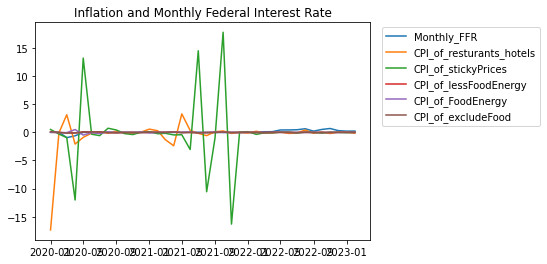

In [120]:
FFR_diff20_23.head()
fig, ax = plt.subplots()

x = FFR_diff20_23['DATE']
for i in FFR_diff20_23.columns[1:]:
    ax.plot(x, FFR_diff20_23[i], label = i)

ax.set_title('Inflation and Monthly Federal Interest Rate')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


In [121]:
FFR_diff20_23.to_csv("FFR_diff20to23.csv")

The federal funds rate and the change in inflation for resturants and hotels seems to be the most correlated, especially in 2020 and 2022.


In [122]:
# test stationarity 
# null is non-stationary
for i in FFR_diff20_23.columns[1:]:
    test_data = FFR_diff20_23[i]
    adf_result = adfuller(test_data)
    adf_statistic = adf_result[0]
    adf_pvalue = adf_result[1]
    print("ADF statistic for ", i, ": ", adf_statistic)
    print("ADF p value for ", i, ": ", adf_pvalue)
    if (adf_pvalue < 0.05):
        print("reject, stationary \n")
    else:
        print("fail to reject, non-stationary \n")
        

ADF statistic for  Monthly_FFR :  -2.5391217117576517
ADF p value for  Monthly_FFR :  0.10624337072954543
fail to reject, non-stationary 

ADF statistic for  CPI_of_resturants_hotels :  -5.378234696535098
ADF p value for  CPI_of_resturants_hotels :  3.7626006501357834e-06
reject, stationary 

ADF statistic for  CPI_of_stickyPrices :  -9.531146931441553
ADF p value for  CPI_of_stickyPrices :  2.8885587519613535e-16
reject, stationary 

ADF statistic for  CPI_of_lessFoodEnergy :  -1.240155969546719
ADF p value for  CPI_of_lessFoodEnergy :  0.6560876088927476
fail to reject, non-stationary 

ADF statistic for  CPI_of_FoodEnergy :  -4.114238590240806
ADF p value for  CPI_of_FoodEnergy :  0.0009173487603652701
reject, stationary 

ADF statistic for  CPI_of_excludeFood :  -5.752329018746843
ADF p value for  CPI_of_excludeFood :  5.926997474767468e-07
reject, stationary 



Too many variables are non-stationary, so we should take the second difference.


In [123]:
FFR_diff2 = FFR_diff20_23.copy()
FFR_diff2 = FFR_diff2.iloc[:, 1:].diff()
FFR_diff2.insert(0, 'DATE', FFR_diff20_23['DATE'][1:])
FFR_diff2 = FFR_diff2.iloc[1:, :]


In [124]:
FFR_diff2.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
21,2020-02-01,0.032781,17.274001,-0.825375,-0.031189,-0.066754,-0.122409
22,2020-03-01,-0.963304,3.235535,-0.623978,-0.066478,-0.005520,-0.122256
23,2020-04-01,0.327587,-5.227582,-11.112477,-0.021789,0.555271,0.009054
24,2020-05-01,0.604258,1.193773,25.270006,0.190106,-0.993671,0.181450
25,2020-06-01,0.026667,0.755779,-13.552456,-0.037641,0.420554,-0.000072


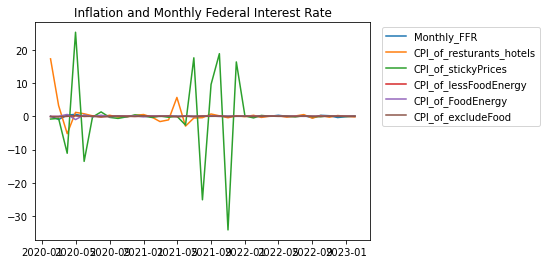

In [125]:
FFR_diff2.head()
fig, ax = plt.subplots()

x = FFR_diff2['DATE']
for i in FFR_diff2.columns[1:]:
    ax.plot(x, FFR_diff2[i], label = i)

ax.set_title('Inflation and Monthly Federal Interest Rate')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


After taking the second difference, we do not see any large changes. 


In [126]:
FFR_diff2.corr()

,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
Monthly_FFR,1.000000,-0.127405,0.145498,0.417064,-0.220864,0.436850
CPI_of_resturants_hotels,-0.127405,1.000000,0.082427,-0.165416,-0.207419,-0.396989
CPI_of_stickyPrices,0.145498,0.082427,1.000000,0.326375,-0.463402,0.271765
CPI_of_lessFoodEnergy,0.417064,-0.165416,0.326375,1.000000,-0.643783,0.835685
CPI_of_FoodEnergy,-0.220864,-0.207419,-0.463402,-0.643783,1.000000,-0.416295
CPI_of_excludeFood,0.436850,-0.396989,0.271765,0.835685,-0.416295,1.000000


In [127]:
for i in FFR_diff2.columns[1:]:
    test_data = FFR_diff2[i]
    adf_result = adfuller(test_data)
    adf_statistic = adf_result[0]
    adf_pvalue = adf_result[1]
    print("ADF statistic for ", i, ": ", adf_statistic)
    print("ADF p value for ", i, ": ", adf_pvalue)
    if (adf_pvalue < 0.05):
        print("reject, stationary \n")
    else:
        print("fail to reject, non-stationary \n")
        

ADF statistic for  Monthly_FFR :  -4.184133545086672
ADF p value for  Monthly_FFR :  0.0007008545393206748
reject, stationary 

ADF statistic for  CPI_of_resturants_hotels :  -3.055162285972792
ADF p value for  CPI_of_resturants_hotels :  0.030054283902553294
reject, stationary 

ADF statistic for  CPI_of_stickyPrices :  -6.356647067425062
ADF p value for  CPI_of_stickyPrices :  2.5331787055928176e-08
reject, stationary 

ADF statistic for  CPI_of_lessFoodEnergy :  -5.9674348148468415
ADF p value for  CPI_of_lessFoodEnergy :  1.9724522241473753e-07
reject, stationary 

ADF statistic for  CPI_of_FoodEnergy :  -2.6940221813138994
ADF p value for  CPI_of_FoodEnergy :  0.0750784174161914
fail to reject, non-stationary 

ADF statistic for  CPI_of_excludeFood :  -3.990778323823011
ADF p value for  CPI_of_excludeFood :  0.001459575919214967
reject, stationary 



We fail to reject non-stationary for Food and energy, so we take another difference.

In [128]:
FFR_diff3 = FFR_diff2.copy()
FFR_diff3 = FFR_diff3.iloc[:, 1:].diff()
FFR_diff3.insert(0, 'DATE', FFR_diff2['DATE'][1:])
FFR_diff3 = FFR_diff3.iloc[1:, :]


In [129]:
for i in FFR_diff3.columns[1:]:
    test_data = FFR_diff3[i]
    adf_result = adfuller(test_data)
    adf_statistic = adf_result[0]
    adf_pvalue = adf_result[1]
    print("ADF statistic for ", i, ": ", adf_statistic)
    print("ADF p value for ", i, ": ", adf_pvalue)
    if (adf_pvalue < 0.05):
        print("reject, stationary \n")
    else:
        print("fail to reject, non-stationary \n")
        

ADF statistic for  Monthly_FFR :  -10.379078145900703
ADF p value for  Monthly_FFR :  2.1627029830826007e-18
reject, stationary 

ADF statistic for  CPI_of_resturants_hotels :  -5.1120435883410815
ADF p value for  CPI_of_resturants_hotels :  1.3257973262519327e-05
reject, stationary 

ADF statistic for  CPI_of_stickyPrices :  -4.915530913779015
ADF p value for  CPI_of_stickyPrices :  3.252637305154967e-05
reject, stationary 

ADF statistic for  CPI_of_lessFoodEnergy :  -7.087471695679361
ADF p value for  CPI_of_lessFoodEnergy :  4.499397055801459e-10
reject, stationary 

ADF statistic for  CPI_of_FoodEnergy :  -5.4322166861856696
ADF p value for  CPI_of_FoodEnergy :  2.8975328987254616e-06
reject, stationary 

ADF statistic for  CPI_of_excludeFood :  -5.208658388655255
ADF p value for  CPI_of_excludeFood :  8.441193417145131e-06
reject, stationary 



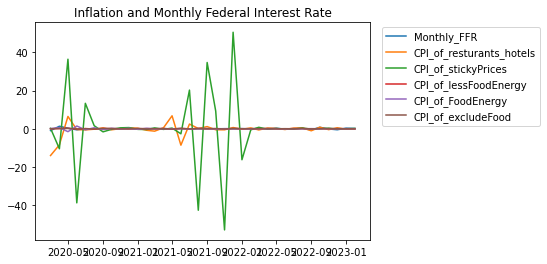

In [130]:
fig, ax = plt.subplots()

x = FFR_diff3['DATE']
for i in FFR_diff3.columns[1:]:
    ax.plot(x, FFR_diff3[i], label = i)

ax.set_title('Inflation and Monthly Federal Interest Rate')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


In [131]:
FFR_diff3.to_csv("2020to2023FFRandInflation_3rdDiff.csv")


In [132]:
FFR_diff3.max()


DATE                        2023-02-01 00:00:00
Monthly_FFR                            1.290891
CPI_of_resturants_hotels               6.756803
CPI_of_stickyPrices                    50.50616
CPI_of_lessFoodEnergy                  0.211896
CPI_of_FoodEnergy                      1.414225
CPI_of_excludeFood                     0.172396
dtype: object

PACF graphs



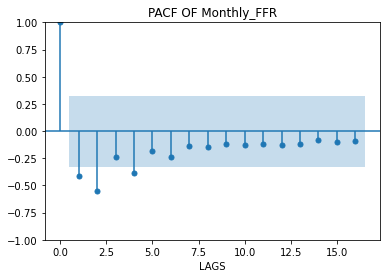

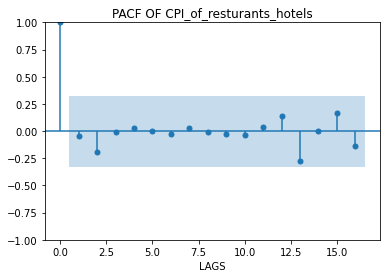

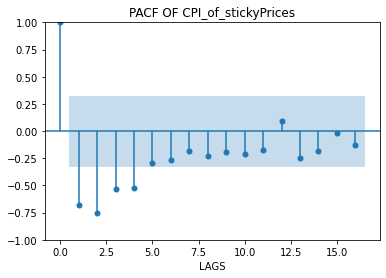

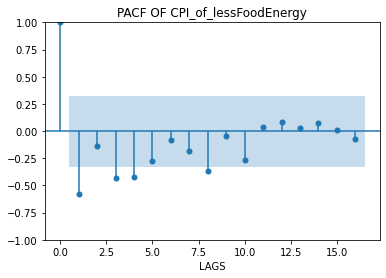

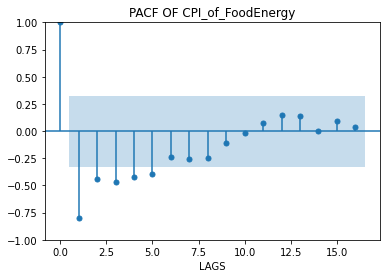

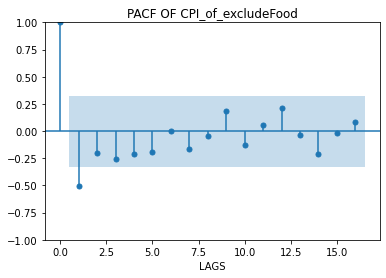

In [133]:
# showing the PACF and ACF graphs
print('PACF graphs\n')
for i in FFR_diff3.columns[1:]:
    plot_pacf(FFR_diff3[i], method = 'ywm')
    plt.title("PACF OF " + i)
    plt.xlabel("LAGS")
    

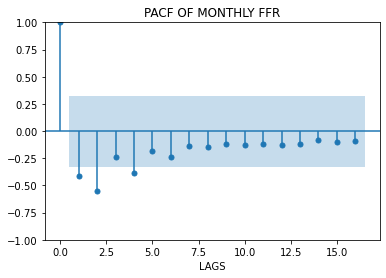

In [134]:
plot_pacf(FFR_diff3['Monthly_FFR'], method = 'ywm')
plt.title("PACF OF MONTHLY FFR")
plt.xlabel("LAGS")
plt.savefig("PACF_of_MonthlyFFR.png")


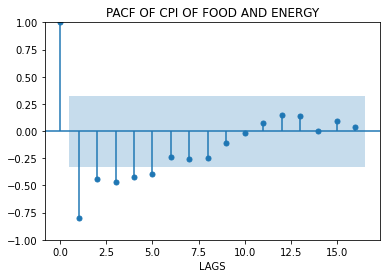

In [135]:
plot_pacf(FFR_diff3['CPI_of_FoodEnergy'], method = 'ywm')
plt.title("PACF OF CPI OF FOOD AND ENERGY")
plt.xlabel("LAGS")
plt.savefig("PACF_of_CPI_of_FoodEnergyR.png")


ACF graphs



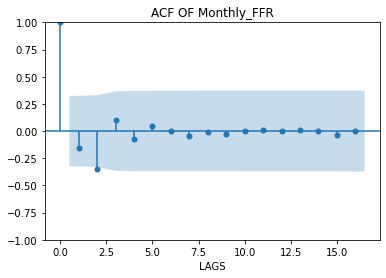

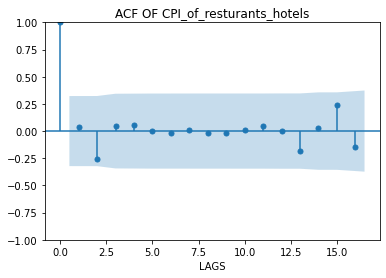

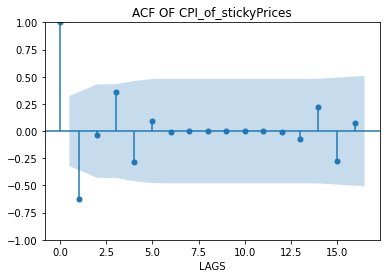

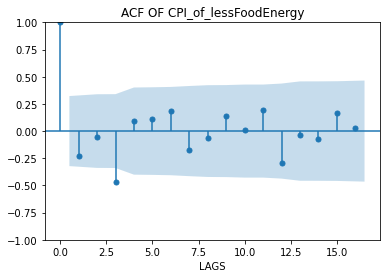

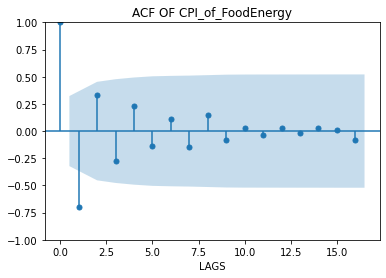

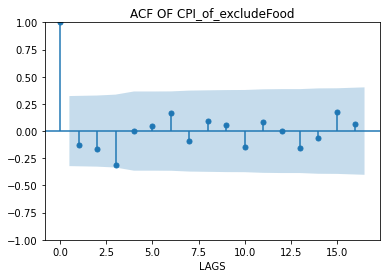

In [136]:
print('ACF graphs\n')
for i in FFR_diff.columns[1:]:
    plot_acf(FFR_diff2[i])
    plt.title("ACF OF " + i)
    plt.xlabel("LAGS")
    

Before going into the ARDL models, the model would be predicting a change in inflation based on the changes of the variable we are predicing itself in the past, and on the change in the federal funds rate in the past. 


### ARDL of FFR and CPI Sticky Prices
* FFR lag 1, 2
* CPI sticky prices lag 1, 2, 3, and 4

In [137]:
FFR_diff3.head()

,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
22,2020-03-01,-0.996085,-14.038466,0.201397,-0.035290,0.061234,0.000152
23,2020-04-01,1.290891,-8.463117,-10.488499,0.044689,0.560791,0.131310
24,2020-05-01,0.276671,6.421355,36.382484,0.211896,-1.548942,0.172396
25,2020-06-01,-0.577591,-0.437994,-38.822462,-0.227747,1.414225,-0.181522
26,2020-07-01,-0.039419,-0.613091,13.297874,0.076947,-0.574244,0.004712


In [138]:
FFR_SP = FFR_diff3[['DATE', 'Monthly_FFR', 'CPI_of_stickyPrices']].copy()
FFR_SP['FFR(LAG1)'] = FFR_diff3['Monthly_FFR'].shift(1)
FFR_SP['FFR(LAG2)'] = FFR_diff3['Monthly_FFR'].shift(2)
FFR_SP['CPI(LAG1)'] = FFR_diff3['CPI_of_stickyPrices'].shift(1)
FFR_SP['CPI(LAG2)'] = FFR_diff3['CPI_of_stickyPrices'].shift(2)
FFR_SP['CPI(LAG3)'] = FFR_diff3['CPI_of_stickyPrices'].shift(3)
FFR_SP['CPI(LAG4)'] = FFR_diff3['CPI_of_stickyPrices'].shift(4)
FFR_SP = FFR_SP.iloc[4:, :]


In [139]:
FFR_SP.head()


,DATE,Monthly_FFR,CPI_of_stickyPrices,FFR(LAG1),FFR(LAG2),CPI(LAG1),CPI(LAG2),CPI(LAG3),CPI(LAG4)
26,2020-07-01,-0.039419,13.297874,-0.577591,0.276671,-38.822462,36.382484,-10.488499,0.201397
27,2020-08-01,0.000419,1.573735,-0.039419,-0.577591,13.297874,-38.822462,36.382484,-10.488499
28,2020-09-01,0.004591,-1.642408,0.000419,-0.039419,1.573735,13.297874,-38.822462,36.382484
29,2020-10-01,0.012903,-0.312979,0.004591,0.000419,-1.642408,1.573735,13.297874,-38.822462
30,2020-11-01,-0.008828,0.466651,0.012903,0.004591,-0.312979,-1.642408,1.573735,13.297874


In [140]:
# sticky prices ARDL(1, 1)
ARDL_SP11 = sm.OLS(endog = FFR_SP['CPI_of_stickyPrices'],
                    exog = sm.add_constant(FFR_SP[['CPI(LAG1)', 'FFR(LAG1)']])).fit()


In [141]:
ARDL_SP11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.427
Model:                             OLS   Adj. R-squared:                  0.387
Method:                  Least Squares   F-statistic:                     10.80
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):           0.000312
Time:                         00:09:23   Log-Likelihood:                -127.30
No. Observations:                   32   AIC:                             260.6
Df Residuals:                       29   BIC:                             265.0
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0243      2.411      0.010      0.992      -4.906       4.955
CPI(LAG1)     -0.6129      0.132     -4.631      0.000      -0.884      -0.342
FFR(LAG1)      3.8031     10.096      0.377      0.709     -16.845      24.451
==============================================================================
Omnibus:                       20.226   Durbin-Watson:                   3.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.051
Skew:                          -1.316   Prob(JB):                     1.22e-09
Kurtosis:                       7.885   Cond. No.                         77.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# sticky prices ARDL(2, 1)
ARDL_SP21 = sm.OLS(endog = FFR_SP['CPI_of_stickyPrices'],
                    exog = sm.add_constant(FFR_SP[['CPI(LAG2)', 'FFR(LAG1)']])).fit()


In [143]:
ARDL_SP21.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                 -0.065
Method:                  Least Squares   F-statistic:                   0.04935
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):              0.952
Time:                         00:09:23   Log-Likelihood:                -136.15
No. Observations:                   32   AIC:                             278.3
Df Residuals:                       29   BIC:                             282.7
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3382      3.178      0.106      0.916      -6.162       6.838
CPI(LAG2)      0.0159      0.164      0.097      0.923      -0.319       0.351
FFR(LAG1)     -3.7451     13.256     -0.283      0.780     -30.858      23.367
==============================================================================
Omnibus:                       11.294   Durbin-Watson:                   3.285
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               25.250
Skew:                          -0.416   Prob(JB):                     3.29e-06
Kurtosis:                       7.271   Cond. No.                         81.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
# ARDL(3, 1)
ARDL_SP31 = sm.OLS(endog = FFR_SP['CPI_of_stickyPrices'],
                   exog = sm.add_constant(FFR_SP[['CPI(LAG3)', 'FFR(LAG1)']])).fit()


In [145]:
ARDL_SP31.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.143
Model:                             OLS   Adj. R-squared:                  0.083
Method:                  Least Squares   F-statistic:                     2.411
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):              0.107
Time:                         00:09:23   Log-Likelihood:                -133.74
No. Observations:                   32   AIC:                             273.5
Df Residuals:                       29   BIC:                             277.9
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3210      2.948      0.109      0.914      -5.708       6.350
CPI(LAG3)      0.3257      0.150      2.172      0.038       0.019       0.632
FFR(LAG1)     -4.4179     12.181     -0.363      0.719     -29.332      20.496
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   3.415
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                6.337
Skew:                          -0.287   Prob(JB):                       0.0421
Kurtosis:                       5.103   Cond. No.                         81.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# ARDL(4, 1)
ARDL_SP41 = sm.OLS(endog = FFR_SP['CPI_of_stickyPrices'],
                    exog = sm.add_constant(FFR_SP[['CPI(LAG4)', 'FFR(LAG1)']])).fit()


In [147]:
ARDL_SP41.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.134
Model:                             OLS   Adj. R-squared:                  0.074
Method:                  Least Squares   F-statistic:                     2.234
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):              0.125
Time:                         00:09:23   Log-Likelihood:                -133.91
No. Observations:                   32   AIC:                             273.8
Df Residuals:                       29   BIC:                             278.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3784      2.963      0.128      0.899      -5.682       6.439
CPI(LAG4)     -0.3153      0.151     -2.089      0.046      -0.624      -0.007
FFR(LAG1)     -2.4830     12.263     -0.202      0.841     -27.563      22.597
==============================================================================
Omnibus:                        9.967   Durbin-Watson:                   3.236
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               13.118
Skew:                          -0.676   Prob(JB):                      0.00142
Kurtosis:                       5.831   Cond. No.                         81.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# ARDL(1, 2)
ARDL_SP12 = sm.OLS(endog = FFR_SP['CPI_of_stickyPrices'],
                    exog = sm.add_constant(FFR_SP[['CPI(LAG1)', 'FFR(LAG2)']])).fit()


In [149]:
ARDL_SP12.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.433
Model:                             OLS   Adj. R-squared:                  0.393
Method:                  Least Squares   F-statistic:                     11.06
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):           0.000270
Time:                         00:09:23   Log-Likelihood:                -127.14
No. Observations:                   32   AIC:                             260.3
Df Residuals:                       29   BIC:                             264.7
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2067      2.402     -0.086      0.932      -5.119       4.705
CPI(LAG1)     -0.6162      0.131     -4.702      0.000      -0.884      -0.348
FFR(LAG2)     -6.5934      9.998     -0.659      0.515     -27.042      13.855
==============================================================================
Omnibus:                       19.548   Durbin-Watson:                   3.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.331
Skew:                          -1.264   Prob(JB):                     2.88e-09
Kurtosis:                       7.808   Cond. No.                         77.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# ARDL(2, 2)
ARDL_SP22 = sm.OLS(endog = FFR_SP['CPI_of_stickyPrices'],
                    exog = sm.add_constant(FFR_SP[['CPI(LAG2)', 'FFR(LAG2)']])).fit()


In [151]:
ARDL_SP22.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.068
Method:                  Least Squares   F-statistic:                   0.01104
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):              0.989
Time:                         00:09:23   Log-Likelihood:                -136.19
No. Observations:                   32   AIC:                             278.4
Df Residuals:                       29   BIC:                             282.8
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4006      3.185      0.126      0.901      -6.113       6.914
CPI(LAG2)      0.0245      0.167      0.147      0.884      -0.317       0.366
FFR(LAG2)     -0.7700     13.506     -0.057      0.955     -28.393      26.853
==============================================================================
Omnibus:                       11.446   Durbin-Watson:                   3.268
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               25.585
Skew:                          -0.436   Prob(JB):                     2.78e-06
Kurtosis:                       7.293   Cond. No.                         83.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# ARDL(3, 2)
ARDL_SP32 = sm.OLS(endog = FFR_SP['CPI_of_stickyPrices'],
                    exog = sm.add_constant(FFR_SP[['CPI(LAG3)', 'FFR(LAG2)']])).fit()


In [153]:
ARDL_SP32.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.142
Model:                             OLS   Adj. R-squared:                  0.082
Method:                  Least Squares   F-statistic:                     2.393
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):              0.109
Time:                         00:09:23   Log-Likelihood:                -133.76
No. Observations:                   32   AIC:                             273.5
Df Residuals:                       29   BIC:                             277.9
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5041      2.950      0.171      0.865      -5.528       6.537
CPI(LAG3)      0.3322      0.152      2.188      0.037       0.022       0.643
FFR(LAG2)      3.9268     12.341      0.318      0.753     -21.312      29.166
==============================================================================
Omnibus:                        5.924   Durbin-Watson:                   3.398
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                6.379
Skew:                          -0.307   Prob(JB):                       0.0412
Kurtosis:                       5.099   Cond. No.                         82.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# ARDL(4, 2)
ARDL_SP42 = sm.OLS(endog = FFR_SP['CPI_of_stickyPrices'],
                    exog = sm.add_constant(FFR_SP[['CPI(LAG4)', 'FFR(LAG2)']])).fit()


In [155]:
ARDL_SP42.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CPI_of_stickyPrices   R-squared:                       0.132
Model:                             OLS   Adj. R-squared:                  0.072
Method:                  Least Squares   F-statistic:                     2.211
Date:                 Thu, 15 Jun 2023   Prob (F-statistic):              0.128
Time:                         00:09:23   Log-Likelihood:                -133.93
No. Observations:                   32   AIC:                             273.9
Df Residuals:                       29   BIC:                             278.3
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4365      2.965      0.147      0.884      -5.628       6.501
CPI(LAG4)     -0.3171      0.151     -2.102      0.044      -0.626      -0.009
FFR(LAG2)      0.1603     12.256      0.013      0.990     -24.905      25.226
==============================================================================
Omnibus:                        9.980   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               13.076
Skew:                          -0.681   Prob(JB):                      0.00145
Kurtosis:                       5.820   Cond. No.                         81.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ARDL of FFR and CPI not food and energy
* FFR lag 1 and 2
* CPI not food and energy lag 1, 3 and 4

In [156]:
FFR_diff3.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
22,2020-03-01,-0.996085,-14.038466,0.201397,-0.035290,0.061234,0.000152
23,2020-04-01,1.290891,-8.463117,-10.488499,0.044689,0.560791,0.131310
24,2020-05-01,0.276671,6.421355,36.382484,0.211896,-1.548942,0.172396
25,2020-06-01,-0.577591,-0.437994,-38.822462,-0.227747,1.414225,-0.181522
26,2020-07-01,-0.039419,-0.613091,13.297874,0.076947,-0.574244,0.004712


In [157]:
FFR_lFE = FFR_diff3[['DATE', 'Monthly_FFR', 'CPI_of_lessFoodEnergy']].copy()
FFR_lFE['FFR(LAG1)'] = FFR_diff3['Monthly_FFR'].shift(1)
FFR_lFE['FFR(LAG2)'] = FFR_diff3['Monthly_FFR'].shift(2)
FFR_lFE['CPI(LAG1)'] = FFR_diff3['CPI_of_lessFoodEnergy'].shift(1)
FFR_lFE['CPI(LAG3)'] = FFR_diff3['CPI_of_lessFoodEnergy'].shift(3)
FFR_lFE['CPI(LAG4)'] = FFR_diff3['CPI_of_lessFoodEnergy'].shift(4)
FFR_lFE = FFR_lFE.iloc[4:, :]


In [158]:
FFR_lFE.head()


,DATE,Monthly_FFR,CPI_of_lessFoodEnergy,FFR(LAG1),FFR(LAG2),CPI(LAG1),CPI(LAG3),CPI(LAG4)
26,2020-07-01,-0.039419,0.076947,-0.577591,0.276671,-0.227747,0.044689,-0.035290
27,2020-08-01,0.000419,-0.173776,-0.039419,-0.577591,0.076947,0.211896,0.044689
28,2020-09-01,0.004591,0.116125,0.000419,-0.039419,-0.173776,-0.227747,0.211896
29,2020-10-01,0.012903,0.061963,0.004591,0.000419,0.116125,0.076947,-0.227747
30,2020-11-01,-0.008828,-0.003752,0.012903,0.004591,0.061963,-0.173776,0.076947


In [159]:
# ARDL(1, 1)
ARDL_lFE11 = sm.OLS(endog = FFR_lFE['CPI_of_lessFoodEnergy'],
                    exog = sm.add_constant(FFR_lFE[['CPI(LAG1)', 'FFR(LAG1)']])).fit()


In [160]:
ARDL_lFE11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     CPI_of_lessFoodEnergy   R-squared:                       0.384
Model:                               OLS   Adj. R-squared:                  0.342
Method:                    Least Squares   F-statistic:                     9.050
Date:                   Thu, 15 Jun 2023   Prob (F-statistic):           0.000883
Time:                           00:09:23   Log-Likelihood:                 49.761
No. Observations:                     32   AIC:                            -93.52
Df Residuals:                         29   BIC:                            -89.12
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.010     -0.130      0.898      -0.021       0.018
CPI(LAG1)     -0.5524      0.130     -4.247      0.000      -0.818      -0.286
FFR(LAG1)      0.0413      0.041      1.002      0.325      -0.043       0.125
==============================================================================
Omnibus:                        5.319   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                3.897
Skew:                          -0.574   Prob(JB):                        0.142
Kurtosis:                       4.268   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# less food and energy ARDL(3, 1)
ARDL_lFE31 = sm.OLS(endog = FFR_lFE['CPI_of_lessFoodEnergy'],
                    exog = sm.add_constant(FFR_lFE[['CPI(LAG3)', 'FFR(LAG1)']])).fit()


In [162]:
ARDL_lFE31.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     CPI_of_lessFoodEnergy   R-squared:                       0.286
Model:                               OLS   Adj. R-squared:                  0.236
Method:                    Least Squares   F-statistic:                     5.795
Date:                   Thu, 15 Jun 2023   Prob (F-statistic):            0.00763
Time:                           00:09:23   Log-Likelihood:                 47.381
No. Observations:                     32   AIC:                            -88.76
Df Residuals:                         29   BIC:                            -84.36
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.010      0.206      0.838      -0.019       0.023
CPI(LAG3)     -0.4060      0.120     -3.396      0.002      -0.651      -0.161
FFR(LAG1)     -0.0073      0.042     -0.172      0.864      -0.094       0.079
==============================================================================
Omnibus:                        0.415   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.528
Skew:                          -0.230   Prob(JB):                        0.768
Kurtosis:                       2.571   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
# ARDL(4, 1)
ARDL_lFE41 = sm.OLS(endog = FFR_lFE['CPI_of_lessFoodEnergy'],
                    exog = sm.add_constant(FFR_lFE[['CPI(LAG4)', 'FFR(LAG1)']])).fit()


In [164]:
ARDL_lFE41.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     CPI_of_lessFoodEnergy   R-squared:                       0.066
Model:                               OLS   Adj. R-squared:                  0.002
Method:                    Least Squares   F-statistic:                     1.025
Date:                   Thu, 15 Jun 2023   Prob (F-statistic):              0.372
Time:                           00:09:23   Log-Likelihood:                 43.094
No. Observations:                     32   AIC:                            -80.19
Df Residuals:                         29   BIC:                            -75.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.012      0.064      0.949      -0.023       0.025
CPI(LAG4)      0.1945      0.137      1.416      0.167      -0.086       0.475
FFR(LAG1)     -0.0176      0.049     -0.360      0.721      -0.117       0.082
==============================================================================
Omnibus:                        7.777   Durbin-Watson:                   2.952
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.222
Skew:                          -0.878   Prob(JB):                       0.0446
Kurtosis:                       4.257   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
# ARDL(1, 2)
ARDL_lFE12 = sm.OLS(endog = FFR_lFE['CPI_of_lessFoodEnergy'],
                    exog = sm.add_constant(FFR_lFE[['CPI(LAG1)', 'FFR(LAG2)']])).fit()


In [166]:
ARDL_lFE12.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     CPI_of_lessFoodEnergy   R-squared:                       0.365
Model:                               OLS   Adj. R-squared:                  0.322
Method:                    Least Squares   F-statistic:                     8.348
Date:                   Thu, 15 Jun 2023   Prob (F-statistic):            0.00137
Time:                           00:09:23   Log-Likelihood:                 49.277
No. Observations:                     32   AIC:                            -92.55
Df Residuals:                         29   BIC:                            -88.16
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.010     -0.162      0.872      -0.021       0.018
CPI(LAG1)     -0.5077      0.128     -3.976      0.000      -0.769      -0.247
FFR(LAG2)      0.0134      0.040      0.331      0.743      -0.069       0.096
==============================================================================
Omnibus:                        3.980   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                2.487
Skew:                          -0.539   Prob(JB):                        0.288
Kurtosis:                       3.838   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
# ARDL(3, 2)
ARDL_lFE32 = sm.OLS(endog = FFR_lFE['CPI_of_lessFoodEnergy'],
                    exog = sm.add_constant(FFR_lFE[['CPI(LAG3)', 'FFR(LAG2)']])).fit()


In [168]:
ARDL_lFE32.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     CPI_of_lessFoodEnergy   R-squared:                       0.285
Model:                               OLS   Adj. R-squared:                  0.236
Method:                    Least Squares   F-statistic:                     5.780
Date:                   Thu, 15 Jun 2023   Prob (F-statistic):            0.00772
Time:                           00:09:23   Log-Likelihood:                 47.369
No. Observations:                     32   AIC:                            -88.74
Df Residuals:                         29   BIC:                            -84.34
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.010      0.214      0.832      -0.019       0.023
CPI(LAG3)     -0.4096      0.125     -3.282      0.003      -0.665      -0.154
FFR(LAG2)     -0.0040      0.044     -0.090      0.929      -0.095       0.087
==============================================================================
Omnibus:                        0.388   Durbin-Watson:                   2.950
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.472
Skew:                          -0.231   Prob(JB):                        0.790
Kurtosis:                       2.624   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# ARDL(4, 2)
ARDL_lFE42 = sm.OLS(endog = FFR_lFE['CPI_of_lessFoodEnergy'],
                    exog = sm.add_constant(FFR_lFE[['CPI(LAG4)', 'FFR(LAG2)']])).fit()


In [170]:
ARDL_lFE42.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     CPI_of_lessFoodEnergy   R-squared:                       0.082
Model:                               OLS   Adj. R-squared:                  0.019
Method:                    Least Squares   F-statistic:                     1.296
Date:                   Thu, 15 Jun 2023   Prob (F-statistic):              0.289
Time:                           00:09:23   Log-Likelihood:                 43.371
No. Observations:                     32   AIC:                            -80.74
Df Residuals:                         29   BIC:                            -76.34
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.012      0.171      0.866      -0.022       0.026
CPI(LAG4)      0.1903      0.135      1.406      0.170      -0.087       0.467
FFR(LAG2)      0.0384      0.048      0.799      0.431      -0.060       0.137
==============================================================================
Omnibus:                        4.407   Durbin-Watson:                   2.964
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                2.966
Skew:                          -0.695   Prob(JB):                        0.227
Kurtosis:                       3.540   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ARDL of FFR and CPI of Food and Energy
* FFR lag 1 and 2
* CPI of Food and Energy lag 1, 2, 3, 4, and 5

In [171]:
FFR_diff3.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
22,2020-03-01,-0.996085,-14.038466,0.201397,-0.035290,0.061234,0.000152
23,2020-04-01,1.290891,-8.463117,-10.488499,0.044689,0.560791,0.131310
24,2020-05-01,0.276671,6.421355,36.382484,0.211896,-1.548942,0.172396
25,2020-06-01,-0.577591,-0.437994,-38.822462,-0.227747,1.414225,-0.181522
26,2020-07-01,-0.039419,-0.613091,13.297874,0.076947,-0.574244,0.004712


In [172]:
FFR_FE = FFR_diff3[['DATE', 'Monthly_FFR', 'CPI_of_FoodEnergy']].copy()
FFR_FE['FFR(LAG1)'] = FFR_diff3['Monthly_FFR'].shift(1)
FFR_FE['FFR(LAG2)'] = FFR_diff3['Monthly_FFR'].shift(2)
FFR_FE['CPI(LAG1)'] = FFR_diff3['CPI_of_FoodEnergy'].shift(1)
FFR_FE['CPI(LAG2)'] = FFR_diff3['CPI_of_FoodEnergy'].shift(2)
FFR_FE['CPI(LAG3)'] = FFR_diff3['CPI_of_FoodEnergy'].shift(3)
FFR_FE = FFR_FE.iloc[3:, :]


In [173]:
FFR_FE.head()


,DATE,Monthly_FFR,CPI_of_FoodEnergy,FFR(LAG1),FFR(LAG2),CPI(LAG1),CPI(LAG2),CPI(LAG3)
25,2020-06-01,-0.577591,1.414225,0.276671,1.290891,-1.548942,0.560791,0.061234
26,2020-07-01,-0.039419,-0.574244,-0.577591,0.276671,1.414225,-1.548942,0.560791
27,2020-08-01,0.000419,0.476605,-0.039419,-0.577591,-0.574244,1.414225,-1.548942
28,2020-09-01,0.004591,-0.451761,0.000419,-0.039419,0.476605,-0.574244,1.414225
29,2020-10-01,0.012903,0.181187,0.004591,0.000419,-0.451761,0.476605,-0.574244


In [174]:
# ARDL(1, 1)
ARDL_FE11 = sm.OLS(endog = FFR_FE['CPI_of_FoodEnergy'],
                    exog = sm.add_constant(FFR_FE[['CPI(LAG1)', 'FFR(LAG1)']])).fit()


In [175]:
ARDL_FE11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CPI_of_FoodEnergy   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           3.11e-14
Time:                        00:09:24   Log-Likelihood:                 26.839
No. Observations:                  33   AIC:                            -47.68
Df Residuals:                      30   BIC:                            -43.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165      0.020      0.839      0.408      -0.024       0.057
CPI(LAG1)     -0.7193      0.052    -13.800      0.000      -0.826      -0.613
FFR(LAG1)     -0.1115      0.087     -1.280      0.211      -0.290       0.066
==============================================================================
Omnibus:                       22.320   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.454
Skew:                           1.720   Prob(JB):                     3.30e-08
Kurtosis:                       6.636   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
summary_str = ARDL_FE11.summary().as_text()

# Create an image with the summary text
image = Image.new('RGB', (800, 600), color=(255, 255, 255))
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
draw.text((10, 10), summary_str, fill=(0, 0, 0), font=font)

# Save the image to a file
image.save('ARDL_FE11.png')


In [177]:
# ARDL(2, 1)
ARDL_FE21 = sm.OLS(endog = FFR_FE['CPI_of_FoodEnergy'],
                    exog = sm.add_constant(FFR_FE[['CPI(LAG2)', 'FFR(LAG1)']])).fit()


In [178]:
ARDL_FE21.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CPI_of_FoodEnergy   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     14.18
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           4.64e-05
Time:                        00:09:24   Log-Likelihood:                 3.6028
No. Observations:                  33   AIC:                            -1.206
Df Residuals:                      30   BIC:                             3.284
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0308      0.040      0.777      0.443      -0.050       0.112
CPI(LAG2)      0.4873      0.100      4.890      0.000       0.284       0.691
FFR(LAG1)      0.0847      0.171      0.494      0.625      -0.266       0.435
==============================================================================
Omnibus:                       57.211   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.274
Skew:                           3.680   Prob(JB):                     6.76e-96
Kurtosis:                      19.266   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
summary_str = ARDL_FE21.summary().as_text()

# Create an image with the summary text
image = Image.new('RGB', (800, 600), color=(255, 255, 255))
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
draw.text((10, 10), summary_str, fill=(0, 0, 0), font=font)

# Save the image to a file
image.save('ARDL_FE21.png')


In [180]:
# ARDL(3, 1)
ARDL_FE31 = sm.OLS(endog = FFR_FE['CPI_of_FoodEnergy'],
                    exog = sm.add_constant(FFR_FE[['CPI(LAG3)', 'FFR(LAG1)']])).fit()


In [181]:
ARDL_FE31.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CPI_of_FoodEnergy   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     5.840
Date:                Thu, 15 Jun 2023   Prob (F-statistic):            0.00721
Time:                        00:09:24   Log-Likelihood:                -1.9487
No. Observations:                  33   AIC:                             9.897
Df Residuals:                      30   BIC:                             14.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0343      0.047      0.731      0.471      -0.062       0.130
CPI(LAG3)     -0.3283      0.113     -2.917      0.007      -0.558      -0.098
FFR(LAG1)      0.2951      0.194      1.523      0.138      -0.101       0.691
==============================================================================
Omnibus:                       61.237   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.878
Skew:                           3.985   Prob(JB):                    7.91e-119
Kurtosis:                      21.221   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
summary_str = ARDL_FE31.summary().as_text()

# Create an image with the summary text
image = Image.new('RGB', (800, 600), color=(255, 255, 255))
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
draw.text((10, 10), summary_str, fill=(0, 0, 0), font=font)

# Save the image to a file
image.save('ARDL_FE31.png')


In [183]:
# ARDL(1, 2)
ARDL_FE12 = sm.OLS(endog = FFR_FE['CPI_of_FoodEnergy'],
                    exog = sm.add_constant(FFR_FE[['CPI(LAG1)', 'FFR(LAG2)']])).fit()


In [184]:
ARDL_FE12.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CPI_of_FoodEnergy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     129.1
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.82e-15
Time:                        00:09:24   Log-Likelihood:                 29.962
No. Observations:                  33   AIC:                            -53.92
Df Residuals:                      30   BIC:                            -49.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0161      0.018      0.901      0.375      -0.020       0.053
CPI(LAG1)     -0.6540      0.046    -14.199      0.000      -0.748      -0.560
FFR(LAG2)      0.1640      0.057      2.869      0.007       0.047       0.281
==============================================================================
Omnibus:                        6.224   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.613
Skew:                           0.821   Prob(JB):                       0.0996
Kurtosis:                       3.812   Cond. No.                         3.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
summary_str = ARDL_FE12.summary().as_text()

# Create an image with the summary text
image = Image.new('RGB', (800, 600), color=(255, 255, 255))
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
draw.text((10, 10), summary_str, fill=(0, 0, 0), font=font)

# Save the image to a file
image.save('ARDL_FE12.png')


In [186]:
# ARDL(2, 2)
ARDL_FE22 = sm.OLS(endog = FFR_FE['CPI_of_FoodEnergy'],
                    exog = sm.add_constant(FFR_FE[['CPI(LAG2)', 'FFR(LAG2)']])).fit()


In [187]:
ARDL_FE22.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CPI_of_FoodEnergy   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     46.53
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           6.38e-10
Time:                        00:09:24   Log-Likelihood:                 15.916
No. Observations:                  33   AIC:                            -25.83
Df Residuals:                      30   BIC:                            -21.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0210      0.027      0.770      0.447      -0.035       0.077
CPI(LAG2)      0.5450      0.066      8.299      0.000       0.411       0.679
FFR(LAG2)      0.4877      0.084      5.813      0.000       0.316       0.659
==============================================================================
Omnibus:                        5.918   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.012
Skew:                           0.529   Prob(JB):                       0.0816
Kurtosis:                       4.589   Cond. No.                         3.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
summary_str = ARDL_FE22.summary().as_text()

# Create an image with the summary text
image = Image.new('RGB', (800, 600), color=(255, 255, 255))
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
draw.text((10, 10), summary_str, fill=(0, 0, 0), font=font)

# Save the image to a file
image.save('ARDL_FE22.png')


In [189]:
# ARDL(3, 2)
ARDL_FE32 = sm.OLS(endog = FFR_FE['CPI_of_FoodEnergy'],
                    exog = sm.add_constant(FFR_FE[['CPI(LAG3)', 'FFR(LAG2)']])).fit()


In [190]:
ARDL_FE32.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CPI_of_FoodEnergy   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     18.97
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           4.72e-06
Time:                        00:09:24   Log-Likelihood:                 6.1151
No. Observations:                  33   AIC:                            -6.230
Df Residuals:                      30   BIC:                            -1.741
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0209      0.037      0.569      0.574      -0.054       0.096
CPI(LAG3)     -0.4492      0.091     -4.958      0.000      -0.634      -0.264
FFR(LAG2)      0.5515      0.116      4.763      0.000       0.315       0.788
==============================================================================
Omnibus:                       12.587   Durbin-Watson:                   2.513
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               21.650
Skew:                           0.751   Prob(JB):                     1.99e-05
Kurtosis:                       6.673   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
summary_str = ARDL_FE32.summary().as_text()

# Create an image with the summary text
image = Image.new('RGB', (800, 600), color=(255, 255, 255))
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
draw.text((10, 10), summary_str, fill=(0, 0, 0), font=font)

# Save the image to a file
image.save('ARDL_FE32.png')


The ARDL(3, 2) model for food and energy is $CPI_{FoodAndEnergy} = -0.0005 + -0.5795 \cdot CPI_{FoodAndEnergy(LAG3} + 0.0119 \cdot FFR_{LAG2}$

This model is our best so far, the lag in the change of inflation at lag 3 and the lag in the change of the federal funds rate at lag 2 both show significance, indicating that this model contains variables that effectively predict the change in inflation for food and energy. The intercept is not significant and very close to 0, so the intercept may not be needed.

### ARDL of FFR and CPI excluding food 
* FFR lag  and 2
* CPI excluding food lag 1 

In [192]:
FFR_diff3.head()


,DATE,Monthly_FFR,CPI_of_resturants_hotels,CPI_of_stickyPrices,CPI_of_lessFoodEnergy,CPI_of_FoodEnergy,CPI_of_excludeFood
22,2020-03-01,-0.996085,-14.038466,0.201397,-0.035290,0.061234,0.000152
23,2020-04-01,1.290891,-8.463117,-10.488499,0.044689,0.560791,0.131310
24,2020-05-01,0.276671,6.421355,36.382484,0.211896,-1.548942,0.172396
25,2020-06-01,-0.577591,-0.437994,-38.822462,-0.227747,1.414225,-0.181522
26,2020-07-01,-0.039419,-0.613091,13.297874,0.076947,-0.574244,0.004712


In [193]:
FFR_eF = FFR_diff3[['DATE', 'Monthly_FFR', 'CPI_of_excludeFood']].copy()
FFR_eF['FFR(LAG1)'] = FFR_diff3['Monthly_FFR'].shift(1)
FFR_eF['FFR(LAG2)'] = FFR_diff3['Monthly_FFR'].shift(2)
FFR_eF['CPI(LAG1)'] = FFR_diff3['CPI_of_excludeFood'].shift(1)
FFR_eF = FFR_eF.iloc[3:, :]


In [194]:
FFR_eF.head()

,DATE,Monthly_FFR,CPI_of_excludeFood,FFR(LAG1),FFR(LAG2),CPI(LAG1)
25,2020-06-01,-0.577591,-0.181522,0.276671,1.290891,0.172396
26,2020-07-01,-0.039419,0.004712,-0.577591,0.276671,-0.181522
27,2020-08-01,0.000419,-0.127326,-0.039419,-0.577591,0.004712
28,2020-09-01,0.004591,0.102344,0.000419,-0.039419,-0.127326
29,2020-10-01,0.012903,0.081217,0.004591,0.000419,0.102344


In [195]:
# excluding food ARDL(1, 1)
ARDL_eF11 = sm.OLS(endog = FFR_eF['CPI_of_excludeFood'],
                    exog = sm.add_constant(FFR_eF[['CPI(LAG1)', 'FFR(LAG1)']])).fit()


In [196]:
ARDL_eF11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CPI_of_excludeFood   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     11.48
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           0.000198
Time:                        00:09:25   Log-Likelihood:                 43.025
No. Observations:                  33   AIC:                            -80.05
Df Residuals:                      30   BIC:                            -75.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0056      0.012     -0.469      0.643      -0.030       0.019
CPI(LAG1)     -0.6407      0.135     -4.737      0.000      -0.917      -0.364
FFR(LAG1)      0.0298      0.051      0.580      0.566      -0.075       0.135
==============================================================================
Omnibus:                        0.299   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.481
Skew:                           0.124   Prob(JB):                        0.786
Kurtosis:                       2.463   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
# ARDL(1, 2)
ARDL_eF12 = sm.OLS(endog = FFR_eF['CPI_of_excludeFood'],
                    exog = sm.add_constant(FFR_eF[['CPI(LAG1)', 'FFR(LAG2)']])).fit()


In [198]:
ARDL_eF12.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CPI_of_excludeFood   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     11.36
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           0.000213
Time:                        00:09:25   Log-Likelihood:                 42.948
No. Observations:                  33   AIC:                            -79.90
Df Residuals:                      30   BIC:                            -75.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0057      0.012     -0.477      0.637      -0.030       0.019
CPI(LAG1)     -0.6096      0.133     -4.600      0.000      -0.880      -0.339
FFR(LAG2)     -0.0165      0.037     -0.441      0.662      -0.093       0.060
==============================================================================
Omnibus:                        0.120   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.334
Skew:                           0.050   Prob(JB):                        0.846
Kurtosis:                       2.517   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ARDL(3, 2) model for food is $CPI_{Food} = 0.0001 + -0.2327 \cdot CPI_{Food(LAG3)} + -0.0036 \cdot FFR_{LAG2}$

This model shows insignifance for all the variables, indicating that this model is not very good at predicting the change in inflation for food. 

## Results

The best model we have achieved is the ARDL(3, 2) model for food and energy is $CPI_{FoodAndEnergy} = -0.0005 + -0.5795 \cdot CPI_{FoodAndEnergy(LAG3} + 0.0119 \cdot FFR_{LAG2}$, we could reformat it to $CPI_{FoodAndEnergy} = -0.5795 \cdot CPI_{FoodAndEnergy(LAG3)} + 0.0119 \cdot FFR_{LAG2}$ to predict the change in inflation. We can conclude here that from 2020 to 2023, the federal funds rate has the most significant on the food and energy part of inflation. 

In [199]:
# create FDL, AR, MA, ARDL, VAR models 
# use the MA and AR to determine lags PACF graphs 
# maybe take the lag of the federal funds rate and calculate the log as well before doing the 
# PACF graphs

# tomorrow, interpret results
# do rest of tests
# understand the python code
# thake the log of data to normalize it, or normalize it with a pipeline 

## Exchange Rates Examination

In [200]:
US_Euro_ER.head()


,DATE,US_Euro_Exchange_Rate
0,2018-04-30,1.2074
1,2018-05-01,1.2000
2,2018-05-02,1.1968
3,2018-05-03,1.1970
4,2018-05-04,1.1946


In [201]:
US_Can_ER.head()


,DATE,US_Canada_Exchange_Rate
0,2018-04-30,1.2818
1,2018-05-01,1.2873
2,2018-05-02,1.2848
3,2018-05-03,1.2878
4,2018-05-04,1.2848


In [202]:
US_Jap_ER.head()


,DATE,US_Japan_Exchange_Rate
0,2018-04-30,109.28
1,2018-05-01,109.69
2,2018-05-02,109.89
3,2018-05-03,109.06
4,2018-05-04,109.16


In [203]:
ER = pd.merge(US_Euro_ER, US_Can_ER, on = 'DATE')
ER = pd.merge(ER, US_Jap_ER, on = 'DATE')


In [204]:
ER.head()


,DATE,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
0,2018-04-30,1.2074,1.2818,109.28
1,2018-05-01,1.2000,1.2873,109.69
2,2018-05-02,1.1968,1.2848,109.89
3,2018-05-03,1.1970,1.2878,109.06
4,2018-05-04,1.1946,1.2848,109.16


In [205]:
mFFR.head()


,Monthly_FFR
DATE,
2018-05-01,1.700000
2018-06-01,1.819667
2018-07-01,1.910000
2018-08-01,1.914839
2018-09-01,1.954667


In [206]:
ER = pd.merge(mFFR, ER, on = 'DATE')


In [207]:
ER.isnull().sum()


DATE                       0
Monthly_FFR                0
US_Euro_Exchange_Rate      0
US_Canada_Exchange_Rate    0
US_Japan_Exchange_Rate     0
dtype: int64

In [208]:
ER.head()


,DATE,Monthly_FFR,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
0,2018-05-01,1.700000,1.2000,1.2873,109.69
1,2018-06-01,1.819667,1.1679,1.2948,109.49
2,2018-08-01,1.914839,1.1666,1.3006,111.72
3,2018-10-01,2.187742,1.1567,1.2799,113.96
4,2018-11-01,2.197667,1.1396,1.3108,112.79


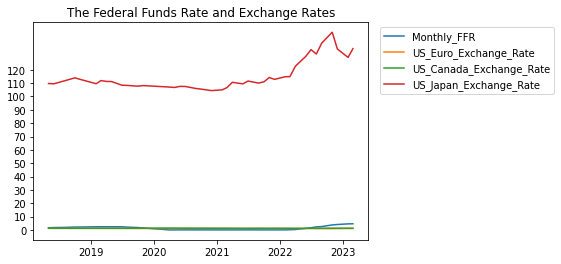

In [209]:
fig, ax = plt.subplots()

# fig here indicates the figure object to hold all the elements of the plot
# fig allows you to interact with the overall plot

x = ER['DATE']
for i in ER.columns[1:]:
    ax.plot(x, ER[i], label = i)

plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])
ax.set_title('The Federal Funds Rate and Exchange Rates')
ax.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')
plt.show()


In [245]:
ER.to_csv('ER.csv')

The exchange rates vary in length, so I think I should standardize the data in some way to make it more readable.


In [210]:
scaler = StandardScaler()
ER_nDate = ER.iloc[:, 1:]
ER_standardized = pd.DataFrame(scaler.fit_transform(ER_nDate), columns = ER_nDate.columns)


In [211]:
ER_standardized.insert(0, 'DATE', ER['DATE'])
ER_standardized.head()


,DATE,Monthly_FFR,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
0,2018-05-01,0.253046,1.266323,-0.380531,-0.498904
1,2018-06-01,0.340054,0.703435,-0.212994,-0.517006
2,2018-08-01,0.409252,0.680639,-0.083433,-0.315164
3,2018-10-01,0.607676,0.507038,-0.545833,-0.112416
4,2018-11-01,0.614892,0.207181,0.144416,-0.218316


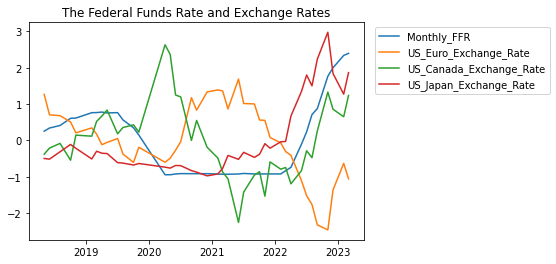

In [212]:
fig, ax = plt.subplots()

# fig here indicates the figure object to hold all the elements of the plot
# fig allows you to interact with the overall plot

x = ER_standardized['DATE']
for i in ER_standardized.columns[1:]:
    ax.plot(x, ER_standardized[i], label = i)

ax.set_title('The Federal Funds Rate and Exchange Rates')
ax.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')
plt.show()


In [246]:
ER_standardized.to_csv("ER_standardized.csv")


We see that the federal funds rate is more correlated with Japan, Canada, and Europe exchange rates from 2022 to 2023. But, from other periods, there are less correlation, however, since we are interested from 2020 to 2023, we should plot the correlation matrix and see what is correlated with each other and why. 


In [213]:
ER_standardized.corr().iloc[:, 0]


Monthly_FFR                1.000000
US_Euro_Exchange_Rate     -0.563352
US_Canada_Exchange_Rate    0.360418
US_Japan_Exchange_Rate     0.632516
Name: Monthly_FFR, dtype: float64

In [214]:
for i in ER_standardized.columns[1:]:
    test_data = ER_standardized[i]
    adf_result = adfuller(test_data)
    adf_statistic = adf_result[0]
    adf_pvalue = adf_result[1]
    print("ADF statistic for ", i, ": ", adf_statistic)
    print("ADF p value for ", i, ": ", adf_pvalue)
    if (adf_pvalue < 0.05):
        print("reject, stationary \n")
    else:
        print("fail to reject, non-stationary \n")


ADF statistic for  Monthly_FFR :  -1.313400061691222
ADF p value for  Monthly_FFR :  0.6230196893358411
fail to reject, non-stationary 

ADF statistic for  US_Euro_Exchange_Rate :  -1.496235223317833
ADF p value for  US_Euro_Exchange_Rate :  0.5353728912009246
fail to reject, non-stationary 

ADF statistic for  US_Canada_Exchange_Rate :  -2.0039721444183156
ADF p value for  US_Canada_Exchange_Rate :  0.2848341727958365
fail to reject, non-stationary 

ADF statistic for  US_Japan_Exchange_Rate :  -2.1357675558776603
ADF p value for  US_Japan_Exchange_Rate :  0.23037754947953804
fail to reject, non-stationary 



In [215]:
date = ER_standardized['DATE']
ER_standardized_diff = ER_standardized.iloc[:, 1:]
ER_standardized_diff.head()


,Monthly_FFR,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
0,0.253046,1.266323,-0.380531,-0.498904
1,0.340054,0.703435,-0.212994,-0.517006
2,0.409252,0.680639,-0.083433,-0.315164
3,0.607676,0.507038,-0.545833,-0.112416
4,0.614892,0.207181,0.144416,-0.218316


In [216]:
ER_standardized_diff = ER_standardized_diff.diff()
ER_standardized_diff.head()


,Monthly_FFR,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
0,NaN,NaN,NaN,NaN
1,0.087008,-0.562888,0.167536,-0.018102
2,0.069198,-0.022796,0.129561,0.201842
3,0.198424,-0.173601,-0.462400,0.202748
4,0.007216,-0.299856,0.690249,-0.105899


In [217]:
ER_standardized_diff.insert(0, 'DATE', date)
ER_standardized_diff.head()


,DATE,Monthly_FFR,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
0,2018-05-01,NaN,NaN,NaN,NaN
1,2018-06-01,0.087008,-0.562888,0.167536,-0.018102
2,2018-08-01,0.069198,-0.022796,0.129561,0.201842
3,2018-10-01,0.198424,-0.173601,-0.462400,0.202748
4,2018-11-01,0.007216,-0.299856,0.690249,-0.105899


In [218]:
ER_standardized_diff = ER_standardized_diff.iloc[1:, :]
ER_standardized_diff.head()


,DATE,Monthly_FFR,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
1,2018-06-01,0.087008,-0.562888,0.167536,-0.018102
2,2018-08-01,0.069198,-0.022796,0.129561,0.201842
3,2018-10-01,0.198424,-0.173601,-0.462400,0.202748
4,2018-11-01,0.007216,-0.299856,0.690249,-0.105899
5,2019-02-01,0.147113,0.136777,-0.029040,-0.293260


In [219]:
for i in ER_standardized_diff.columns[1:]:
    test_data = ER_standardized_diff[i]
    adf_result = adfuller(test_data)
    adf_statistic = adf_result[0]
    adf_pvalue = adf_result[1]
    print("ADF statistic for ", i, ": ", adf_statistic)
    print("ADF p value for ", i, ": ", adf_pvalue)
    if (adf_pvalue < 0.05):
        print("reject, stationary \n")
    else:
        print("fail to reject, non-stationary \n")
        

ADF statistic for  Monthly_FFR :  -2.114792348052645
ADF p value for  Monthly_FFR :  0.23860827467739493
fail to reject, non-stationary 

ADF statistic for  US_Euro_Exchange_Rate :  -6.270094639230701
ADF p value for  US_Euro_Exchange_Rate :  4.023990776866326e-08
reject, stationary 

ADF statistic for  US_Canada_Exchange_Rate :  -7.138223856398921
ADF p value for  US_Canada_Exchange_Rate :  3.37711638625211e-10
reject, stationary 

ADF statistic for  US_Japan_Exchange_Rate :  -2.468753777014332
ADF p value for  US_Japan_Exchange_Rate :  0.12326312259695887
fail to reject, non-stationary 



We see that after the first difference, some of the data is still non-stationary and needs to be differenced again in order to make it stationary. 

In [220]:
date = ER_standardized_diff['DATE']
ER_standardized_diff = ER_standardized_diff.iloc[:, 1:]
ER_standardized_diff.head()


,Monthly_FFR,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
1,0.087008,-0.562888,0.167536,-0.018102
2,0.069198,-0.022796,0.129561,0.201842
3,0.198424,-0.173601,-0.462400,0.202748
4,0.007216,-0.299856,0.690249,-0.105899
5,0.147113,0.136777,-0.029040,-0.293260


In [221]:
ER_standardized_diff = ER_standardized_diff.diff()
ER_standardized_diff.insert(0, 'DATE', date)
ER_standardized_diff.head()


,DATE,Monthly_FFR,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
1,2018-06-01,NaN,NaN,NaN,NaN
2,2018-08-01,-0.017810,0.540092,-0.037975,0.219945
3,2018-10-01,0.129226,-0.150805,-0.591961,0.000905
4,2018-11-01,-0.191208,-0.126255,1.152649,-0.308647
5,2019-02-01,0.139897,0.436633,-0.719289,-0.187360


In [222]:
ER_standardized_diff = ER_standardized_diff.iloc[1:, :]
ER_standardized_diff.head()


,DATE,Monthly_FFR,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
2,2018-08-01,-0.017810,0.540092,-0.037975,0.219945
3,2018-10-01,0.129226,-0.150805,-0.591961,0.000905
4,2018-11-01,-0.191208,-0.126255,1.152649,-0.308647
5,2019-02-01,0.139897,0.436633,-0.719289,-0.187360
6,2019-03-01,-0.143361,-0.308624,0.435594,0.505059


In [223]:
for i in ER_standardized_diff.columns[1:]:
    test_data = ER_standardized_diff[i]
    adf_result = adfuller(test_data)
    adf_statistic = adf_result[0]
    adf_pvalue = adf_result[1]
    print("ADF statistic for ", i, ": ", adf_statistic)
    print("ADF p value for ", i, ": ", adf_pvalue)
    if (adf_pvalue < 0.05):
        print("reject, stationary \n")
    else:
        print("fail to reject, non-stationary \n")


ADF statistic for  Monthly_FFR :  -11.257798896867667
ADF p value for  Monthly_FFR :  1.650463089838722e-20
reject, stationary 

ADF statistic for  US_Euro_Exchange_Rate :  -5.922126136705225
ADF p value for  US_Euro_Exchange_Rate :  2.4921790993114437e-07
reject, stationary 

ADF statistic for  US_Canada_Exchange_Rate :  -8.006658576264357
ADF p value for  US_Canada_Exchange_Rate :  2.2581931923051733e-12
reject, stationary 

ADF statistic for  US_Japan_Exchange_Rate :  -3.520451214100426
ADF p value for  US_Japan_Exchange_Rate :  0.007477137816284481
reject, stationary 



After taking the second difference, it the data is now stationary. 

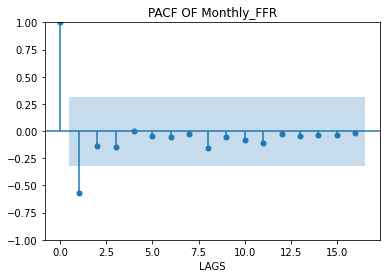

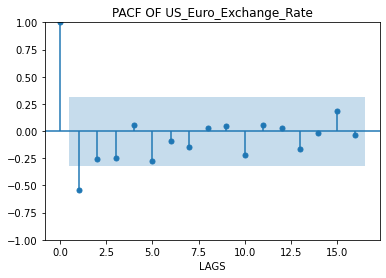

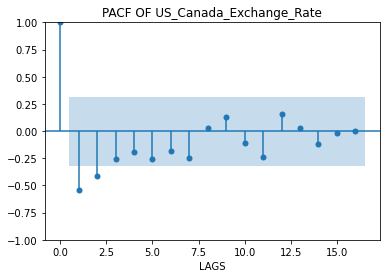

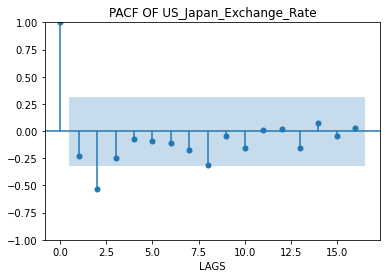

In [224]:
for i in ER_standardized_diff.columns[1:]:
    plot_pacf(ER_standardized_diff[i], method = 'ywm')
    plt.title("PACF OF " + i)
    plt.xlabel("LAGS")
    

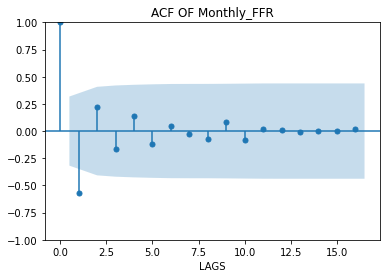

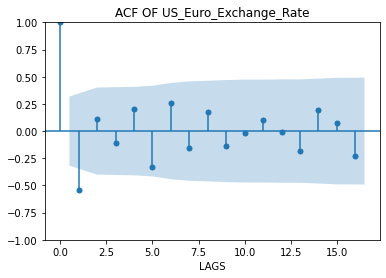

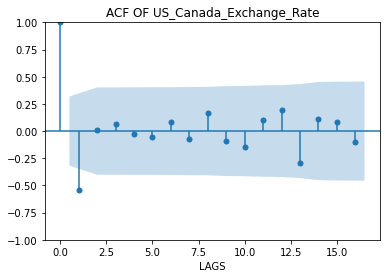

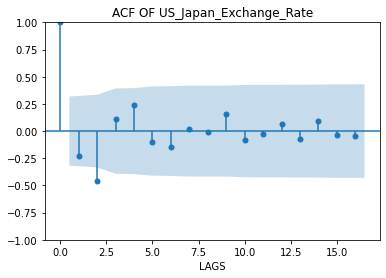

In [225]:
for i in ER_standardized_diff.columns[1:]:
    plot_acf(ER_standardized_diff[i])
    plt.title("ACF OF " + i)
    plt.xlabel("LAGS")
    

In [226]:
ER_standardized_diff.head()


,DATE,Monthly_FFR,US_Euro_Exchange_Rate,US_Canada_Exchange_Rate,US_Japan_Exchange_Rate
2,2018-08-01,-0.017810,0.540092,-0.037975,0.219945
3,2018-10-01,0.129226,-0.150805,-0.591961,0.000905
4,2018-11-01,-0.191208,-0.126255,1.152649,-0.308647
5,2019-02-01,0.139897,0.436633,-0.719289,-0.187360
6,2019-03-01,-0.143361,-0.308624,0.435594,0.505059


In [227]:
ER_eer = ER_standardized_diff[['DATE', 'Monthly_FFR', 'US_Euro_Exchange_Rate']].copy()


In [228]:
ER_eer['FFR(LAG1)'] = ER_eer['Monthly_FFR'].shift(1)
ER_eer['UEer(LAG1)'] = ER_eer['US_Euro_Exchange_Rate'].shift(1)
ER_eer = ER_eer.iloc[1:, :]


In [229]:
ER_eer.head()


,DATE,Monthly_FFR,US_Euro_Exchange_Rate,FFR(LAG1),UEer(LAG1)
3,2018-10-01,0.129226,-0.150805,-0.017810,0.540092
4,2018-11-01,-0.191208,-0.126255,0.129226,-0.150805
5,2019-02-01,0.139897,0.436633,-0.191208,-0.126255
6,2019-03-01,-0.143361,-0.308624,0.139897,0.436633
7,2019-04-01,0.009702,-0.119241,-0.143361,-0.308624


### ARDL for Exchange Rate and US-European Exchange Rates
* FFR lag 1
* US-European Exchange Rates lag 1

In [230]:
# ARDL for US_Euro_Exchange_Rate
# ARDL(1, 1)
ARDL_EReer11 = sm.OLS(endog = ER_eer['US_Euro_Exchange_Rate'],
                      exog = sm.add_constant(ER_eer[['UEer(LAG1)', 'FFR(LAG1)']])).fit()


In [231]:
ARDL_EReer11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     US_Euro_Exchange_Rate   R-squared:                       0.339
Model:                               OLS   Adj. R-squared:                  0.300
Method:                    Least Squares   F-statistic:                     8.714
Date:                   Thu, 15 Jun 2023   Prob (F-statistic):           0.000881
Time:                           00:09:28   Log-Likelihood:                -28.812
No. Observations:                     37   AIC:                             63.62
Df Residuals:                         34   BIC:                             68.46
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.091      0.096      0.924      -0.175       0.193
UEer(LAG1)    -0.6032      0.145     -4.154      0.000      -0.898      -0.308
FFR(LAG1)      0.2277      0.291      0.783      0.439      -0.363       0.818
==============================================================================
Omnibus:                        2.113   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.112
Skew:                           0.060   Prob(JB):                        0.573
Kurtosis:                       3.841   Cond. No.                         3.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
summary_str = ARDL_EReer11.summary().as_text()

# Create an image with the summary text
image = Image.new('RGB', (800, 600), color=(255, 255, 255))
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
draw.text((10, 10), summary_str, fill=(0, 0, 0), font=font)

# Save the image to a file
image.save('ARDL_EReer111.png')

The ARDL(1, 1) equation is $US.European.ER = 0.0087 + -0.6023 \cdot US.European.ER_{LAG1} + 0.02277 \cdot FFR_{LAG1}$

### ARDL for Exchange Rate and US-Canada Exchange Rate
* FFR lag 1
* US-Canada Exchange Rates lag 1, lag 2

In [232]:
# ARDL for US_Canada_Exchange_Rate 
# ARDL(1, 1)
# ARDL(1, 2)
ER_cer = ER_standardized_diff[['DATE', 'Monthly_FFR', 'US_Canada_Exchange_Rate']].copy()


In [233]:
ER_cer.head()

,DATE,Monthly_FFR,US_Canada_Exchange_Rate
2,2018-08-01,-0.017810,-0.037975
3,2018-10-01,0.129226,-0.591961
4,2018-11-01,-0.191208,1.152649
5,2019-02-01,0.139897,-0.719289
6,2019-03-01,-0.143361,0.435594


In [234]:
ER_cer['FFR(LAG1)'] = ER_cer['Monthly_FFR'].shift(1)
ER_cer['UCer(LAG1)'] = ER_cer['US_Canada_Exchange_Rate'].shift(1)
ER_cer['UCer(LAG2)'] = ER_cer['US_Canada_Exchange_Rate'].shift(2)
ER_cer = ER_cer.iloc[2:, :]


In [235]:
ER_cer.head()


,DATE,Monthly_FFR,US_Canada_Exchange_Rate,FFR(LAG1),UCer(LAG1),UCer(LAG2)
4,2018-11-01,-0.191208,1.152649,0.129226,-0.591961,-0.037975
5,2019-02-01,0.139897,-0.719289,-0.191208,1.152649,-0.591961
6,2019-03-01,-0.143361,0.435594,0.139897,-0.719289,1.152649
7,2019-04-01,0.009702,-0.256889,-0.143361,0.435594,-0.719289
8,2019-05-01,-0.037230,0.013403,0.009702,-0.256889,0.435594


In [236]:
ARDL_ERcer11 = sm.OLS(endog = ER_cer['US_Canada_Exchange_Rate'],
                      exog = sm.add_constant(ER_cer[['UCer(LAG1)', 'FFR(LAG1)']])).fit()


In [237]:
ARDL_ERcer11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     US_Canada_Exchange_Rate   R-squared:                       0.323
Model:                                 OLS   Adj. R-squared:                  0.282
Method:                      Least Squares   F-statistic:                     7.885
Date:                     Thu, 15 Jun 2023   Prob (F-statistic):            0.00159
Time:                             00:09:28   Log-Likelihood:                -46.459
No. Observations:                       36   AIC:                             98.92
Df Residuals:                           33   BIC:                             103.7
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0271      0.153      0.177      0.861      -0.284       0.339
UCer(LAG1)    -0.6095      0.155     -3.925      0.000      -0.925      -0.294
FFR(LAG1)     -0.4875      0.523     -0.932      0.358      -1.551       0.576
==============================================================================
Omnibus:                        1.107   Durbin-Watson:                   2.392
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                0.444
Skew:                           0.244   Prob(JB):                        0.801
Kurtosis:                       3.240   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ARDL(1, 1) equation is $US.Canada.ER = 0.0271 + -0.6095 \cdot US.Canada.ER_{LAG1} + -0.4875 \cdot FFR_{LAG1}$

In [238]:
ARDL_ERcer21 = sm.OLS(endog = ER_cer['US_Canada_Exchange_Rate'],
                      exog = sm.add_constant(ER_cer[['UCer(LAG2)', 'FFR(LAG1)']])).fit()


In [239]:
ARDL_ERcer21.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     US_Canada_Exchange_Rate   R-squared:                       0.008
Model:                                 OLS   Adj. R-squared:                 -0.052
Method:                      Least Squares   F-statistic:                    0.1290
Date:                     Thu, 15 Jun 2023   Prob (F-statistic):              0.879
Time:                             00:09:28   Log-Likelihood:                -53.351
No. Observations:                       36   AIC:                             112.7
Df Residuals:                           33   BIC:                             117.5
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0265      0.186      0.143      0.887      -0.351       0.404
UCer(LAG2)    -0.0166      0.182     -0.091      0.928      -0.386       0.353
FFR(LAG1)      0.3086      0.611      0.505      0.617      -0.935       1.552
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   3.011
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.236
Skew:                           0.197   Prob(JB):                        0.889
Kurtosis:                       2.944   Cond. No.                         3.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ARDL(2, 1) equation is $US.Canada.ER = 0.0265 + -0.0166 \cdot US.Canada.ER_{LAG2} + 0.3086 \cdot FFR_{LAG1}$

### ARDL for Interest Rate and US-Japan Exchange Rate
* FFR lag 1
* US-Japan Exchange Rates lag 2

In [240]:
# ARDL for US_Canada_Exchange_Rate 
# ARDL(1, 2)
ER_jer = ER_standardized_diff[['DATE', 'Monthly_FFR', 'US_Japan_Exchange_Rate']].copy()


In [241]:
ER_jer['FFR(LAG1)'] = ER_jer['Monthly_FFR'].shift(1)
ER_jer['UJer(LAG2)'] = ER_jer['US_Japan_Exchange_Rate'].shift(2)
ER_jer = ER_jer.iloc[2:, :]


In [242]:
ER_jer.head()


,DATE,Monthly_FFR,US_Japan_Exchange_Rate,FFR(LAG1),UJer(LAG2)
4,2018-11-01,-0.191208,-0.308647,0.129226,0.219945
5,2019-02-01,0.139897,-0.187360,-0.191208,0.000905
6,2019-03-01,-0.143361,0.505059,0.139897,-0.308647
7,2019-04-01,0.009702,-0.266106,-0.143361,-0.187360
8,2019-05-01,-0.037230,0.044351,0.009702,0.505059


In [243]:
ARDL_ERjer21 = sm.OLS(endog = ER_jer['US_Japan_Exchange_Rate'],
                      exog = sm.add_constant(ER_jer[['UJer(LAG2)', 'FFR(LAG1)']])).fit()


In [244]:
ARDL_ERjer21.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     US_Japan_Exchange_Rate   R-squared:                       0.273
Model:                                OLS   Adj. R-squared:                  0.229
Method:                     Least Squares   F-statistic:                     6.197
Date:                    Thu, 15 Jun 2023   Prob (F-statistic):            0.00519
Time:                            00:09:28   Log-Likelihood:                -20.139
No. Observations:                      36   AIC:                             46.28
Df Residuals:                          33   BIC:                             51.03
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.074     -0.064      0.949      -0.155       0.146
UJer(LAG2)    -0.5429      0.168     -3.236      0.003      -0.884      -0.202
FFR(LAG1)     -0.1728      0.237     -0.728      0.472      -0.656       0.310
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   3.072
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.112
Skew:                          -0.292   Prob(JB):                        0.573
Kurtosis:                       3.633   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ARDL(2, 1) equation is $US.Japan.ER = -0.0047 + -0.5429 \cdot US.Japan.ER_{LAG2} + -0.1728 \cdot FFR_{LAG1}